# MTMW14: Assignment 1

## Student no. : 30837509

# Initial conditions

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.pyplot import figure

r = 0.25
α = 0.125
γ = 0.75
b0 = 2.5
c = 1
Tnon = 7.5
hnon = 150
tnon = 2
dt1 = 1/30
tmin = 0
tmax = 41*5
dt = dt1/tnon
tfin = tmax/tnon
nt = int(tfin/dt)

Times=np.linspace(tmin,tfin,nt)

# Equations

In [79]:
def hval(r,α,b,T,h,E1):
    
    return -r*h - α*b*T - α*E1

def Tval(b,R,γ,T,h,en,E1,E2):
    
    return R*T + γ*h - en*(h + b*T)**3 + γ*E1 + E2

def Selfexcite(µo,µann,τ,t):
    
    return µo*(1+µann*np.cos((2*np.pi*t/τ)-(5*np.pi/6)))

def noisywind(fann,fran,τ,t,W,τcorr,delt):
    
    return fann*np.cos(2*np.pi*t/τ) + fran*W*τcorr/delt

#  Runge Kutta Scheme

In [63]:
def RungeKutta(Tinit,hinit,µo,µann,τ,t,en,E2,fann,fran,τcorr):
    
    T = (Tinit/Tnon)*np.ones(nt)
    h = (hinit/hnon)*np.ones(nt)

    for i in range(nt-1):
        
        W = np.random.uniform(-1,1)
        E1 = noisywind(fann,fran,τ,t[i],W,τcorr,dt)
        b = b0*Selfexcite(µo,µann,τ,t[i])
        R = γ*b - c 
        
        k1 = Tval(b,R,γ,T[i],h[i],en,E1,E2)
        l1 = hval(r,α,b,T[i],h[i],E1)
        
        k2 = Tval(b,R,γ,T[i]+(k1*dt/2),h[i]+(l1*dt/2),en,E1,E2)
        l2 = hval(r,α,b,T[i]+(k1*dt/2),h[i]+(l1*dt/2),E1)
        
        k3 = Tval(b,R,γ,T[i]+(k2*dt/2),h[i]+(l2*dt/2),en,E1,E2)
        l3 = hval(r,α,b,T[i]+(k2*dt/2),h[i]+(l2*dt/2),E1)
    
        k4 = Tval(b,R,γ,T[i]+(k3*dt),h[i]+(l3*dt),en,E1,E2)
        l4 = hval(r,α,b,T[i]+(k3*dt),h[i]+(l3*dt),E1)
         
        T[i+1]=T[i]+ 1/6 * dt*(k1 + 2*k2 + 2*k3 + k4)
        h[i+1]=h[i] + 1/6 * dt*(l1 + 2*l2 + 2*l3 + l4)
        
    return T,h

# Task 1

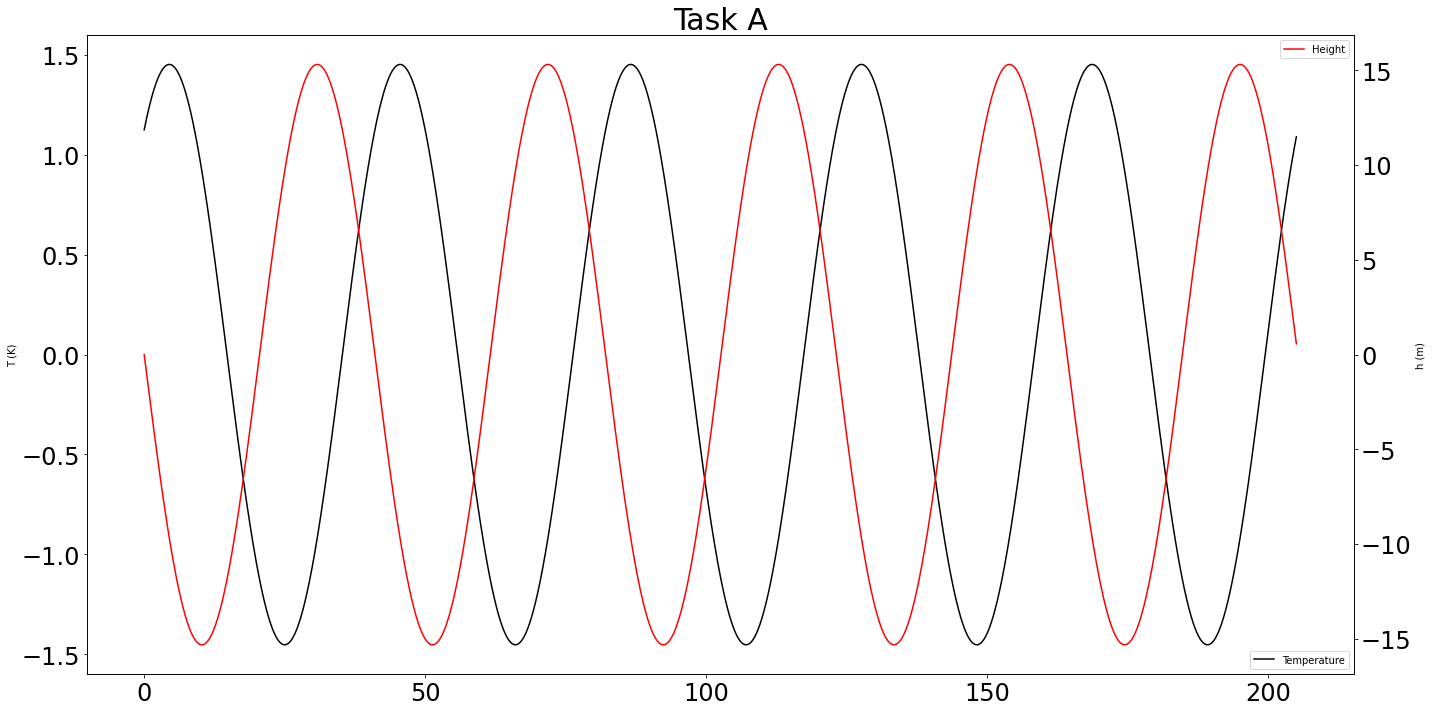

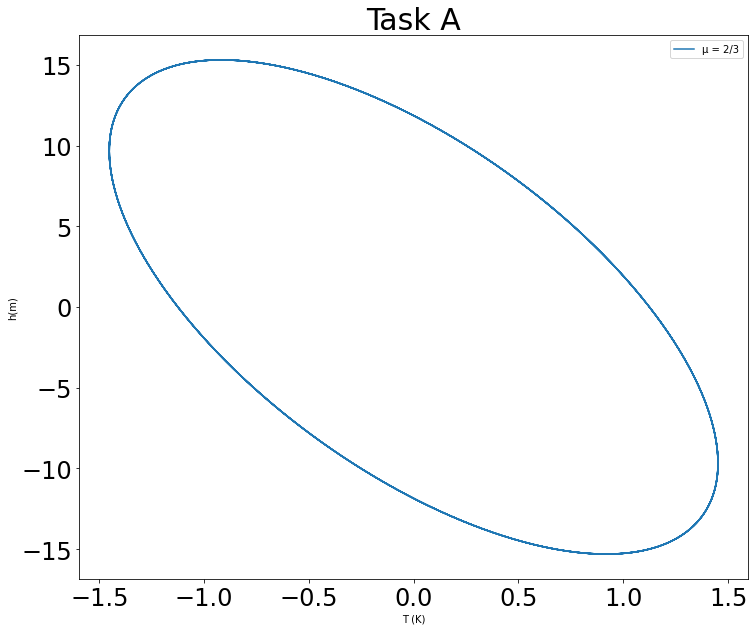

In [64]:
T,h = RungeKutta(1.125,0,2/3,0,1,Times,0,0,0,0,0)
Tnew = T*Tnon
hnew = h*hnon

fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.plot(Times*tnon,Tnew, 'k-', label='Temperature')
plt.ylabel('T (K)')
plt.legend(loc='lower right')
ax2=ax1.twinx()
ax2.plot(Times*tnon,hnew, 'r-', label='Height')
plt.ylabel('h (m)')
plt.legend(loc='best')
ax1.xaxis.set_tick_params(labelsize=24)
ax1.yaxis.set_tick_params(labelsize=24)
ax2.yaxis.set_tick_params(labelsize=24)
plt.ylabel('h (m)')
plt.xlabel('t (month)')
plt.title('Task A',fontsize = 30)
plt.tight_layout()
#plt.show()
figname='RK-timeseries.png'
fig.savefig(figname, dpi=300)

fig, ax1 = plt.subplots(figsize=(12, 10))
#Against each other
ax1.plot(Tnew,hnew,label='µ = 2/3')
ax1.xaxis.set_tick_params(labelsize=24)
ax1.yaxis.set_tick_params(labelsize=24)
plt.legend(loc='best')
plt.xlabel('T (K)')
plt.ylabel('h(m)')
plt.title('Task A',fontsize = 30)
#plt.show()
figname='RK-phase.png'
fig.savefig(figname, dpi=300)

# Task B

## µ < 2/3

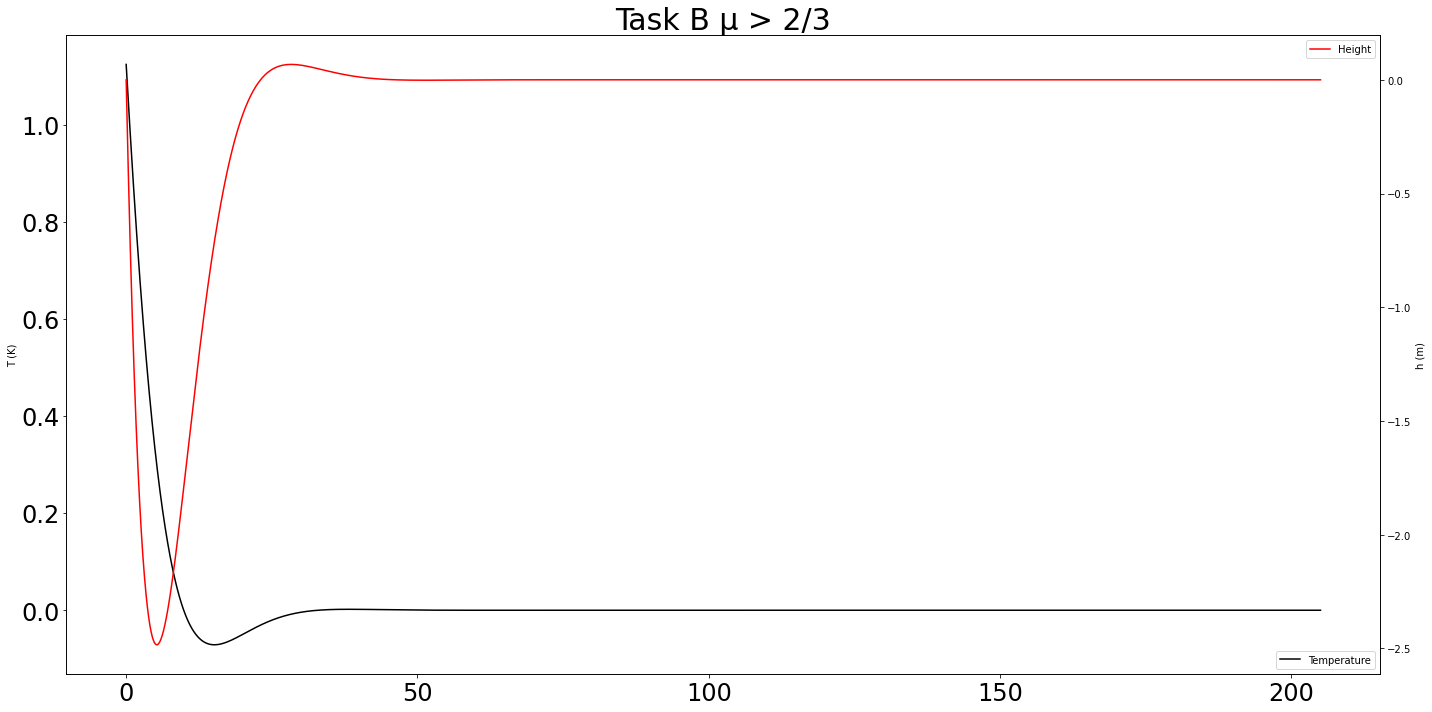

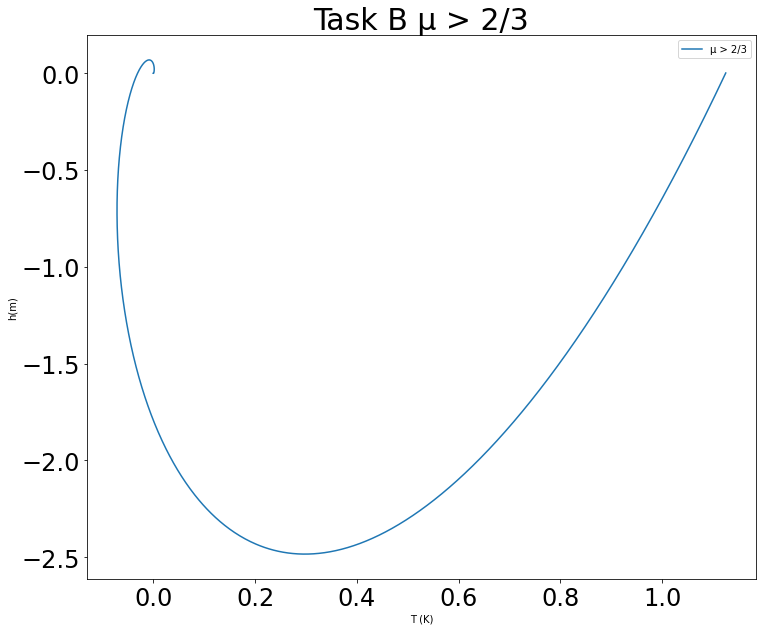

In [65]:
T,h = RungeKutta(1.125,0,1/3,0,1,Times,0,0,0,0,0)
Tnew = T*Tnon
hnew = h*hnon

fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.plot(Times*tnon,Tnew, 'k-', label='Temperature')
plt.ylabel('T (K)')
plt.legend(loc='lower right')
ax1.xaxis.set_tick_params(labelsize=24)
ax1.yaxis.set_tick_params(labelsize=24)
ax2.yaxis.set_tick_params(labelsize=24)
ax2=ax1.twinx()
ax2.plot(Times*tnon,hnew, 'r-', label='Height')
plt.ylabel('h (m)')
plt.legend(loc='best')
plt.xlabel('t (month)')
plt.ylabel('h (m)')
plt.title('Task B µ > 2/3',fontsize = 30)
plt.tight_layout()
#plt.show()
figname='RK-timeseriestask2a.png'
fig.savefig(figname, dpi=300)

fig, ax1 = plt.subplots(figsize=(12, 10))
#Against each other
ax1.plot(Tnew,hnew,label='µ > 2/3')
plt.legend(loc='best')
ax1.xaxis.set_tick_params(labelsize=24)
ax1.yaxis.set_tick_params(labelsize=24)
plt.xlabel('T (K)')
plt.ylabel('h(m)')
plt.title('Task B µ > 2/3',fontsize = 30)
#plt.show()
figname='RK-phasetask2a.png'
fig.savefig(figname, dpi=300)

## µ > 2/3

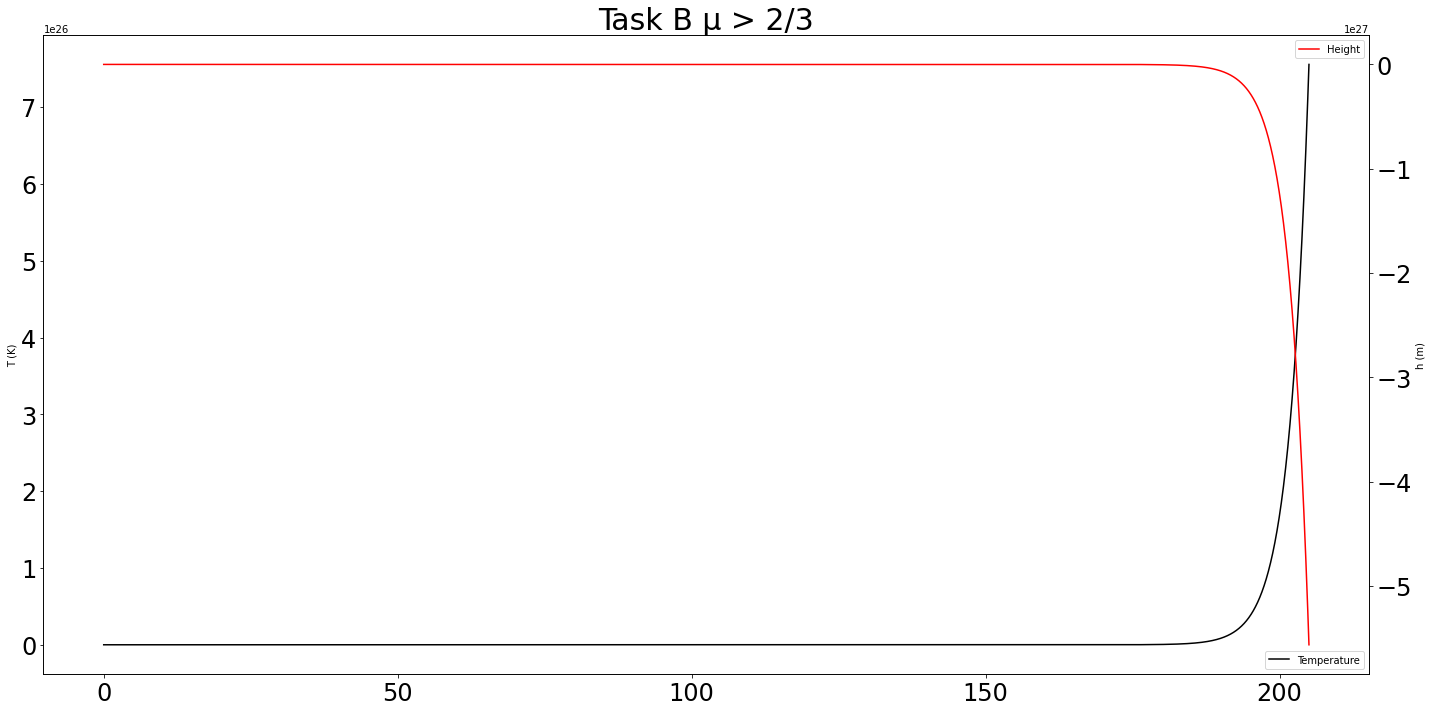

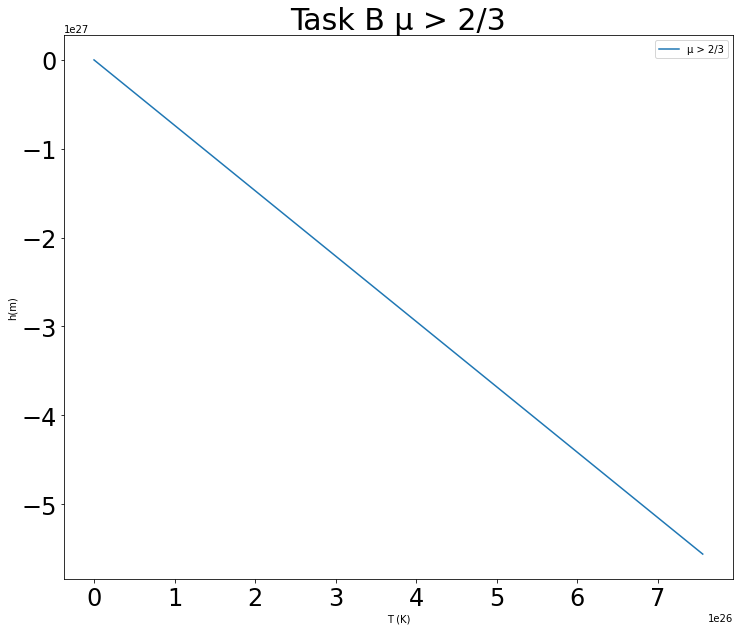

In [66]:
T,h = RungaKutta(1.125,0,1,0,1,Times,0,0,0,0,0)
Tnew = T*Tnon
hnew = h*hnon

fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.plot(Times*tnon,Tnew, 'k-', label='Temperature')
plt.ylabel('T (K)')
plt.legend(loc='lower right')
ax2=ax1.twinx()
ax2.plot(Times*tnon,hnew, 'r-', label='Height')
plt.ylabel('h (m)')
plt.legend(loc='best')
ax1.xaxis.set_tick_params(labelsize=24)
ax1.yaxis.set_tick_params(labelsize=24)
ax2.yaxis.set_tick_params(labelsize=24)
plt.xlabel('t (month)')
plt.ylabel('h (m)')
plt.title('Task B µ > 2/3',fontsize = 30)
plt.tight_layout()
#plt.show()
figname='RK-timeseriestask2a.png'
fig.savefig(figname, dpi=300)

fig, ax1 = plt.subplots(figsize=(12, 10))
#Against each other
ax1.plot(Tnew,hnew,label='µ > 2/3')
ax1.xaxis.set_tick_params(labelsize=24)
ax1.yaxis.set_tick_params(labelsize=24)
plt.legend(loc='best')
plt.xlabel('T (K)')
plt.ylabel('h(m)')
plt.title('Task B µ > 2/3',fontsize = 30)
#plt.show()
figname='RK-phasetask2a.png'
fig.savefig(figname, dpi=300)

# Task C

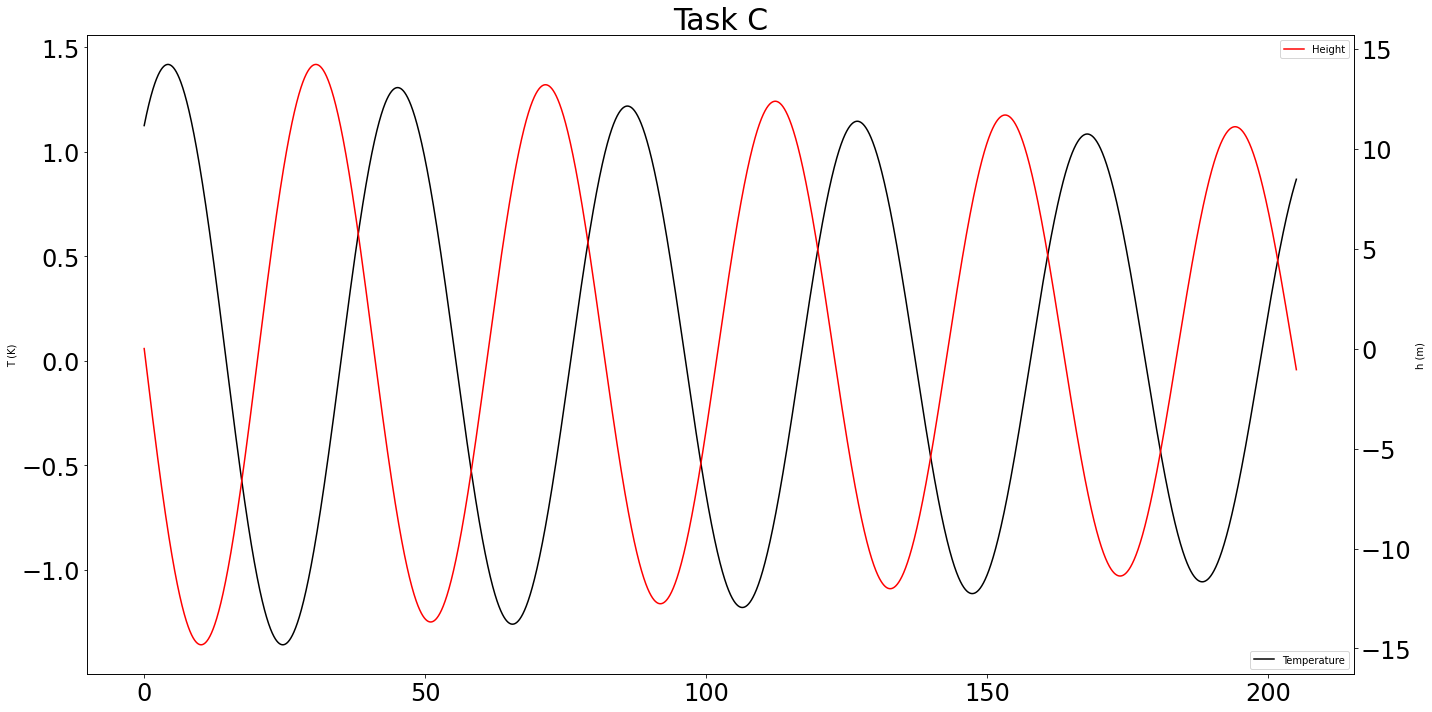

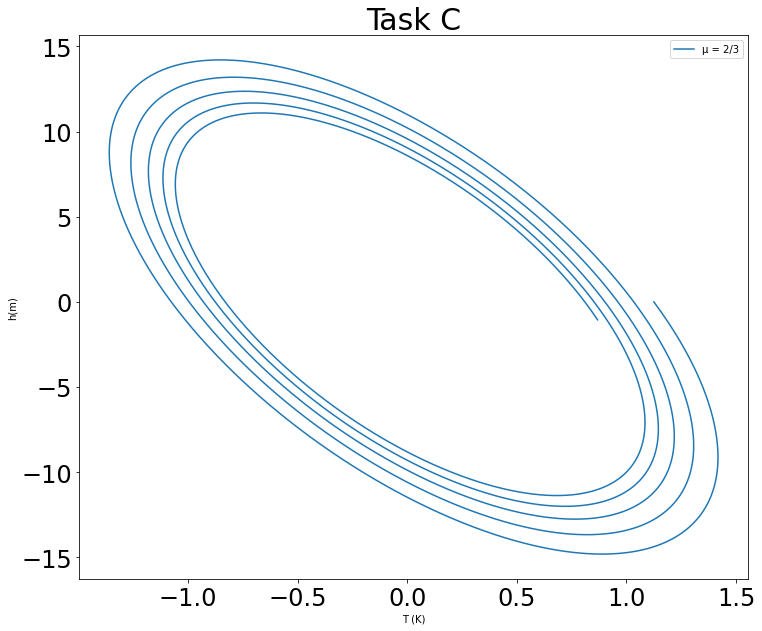

In [67]:
T,h = RungaKutta(1.125,0,2/3,0,1,Times,0.1,0,0,0,0)
Tnew = T*Tnon
hnew = h*hnon

fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.plot(Times*tnon,Tnew, 'k-', label='Temperature')
plt.ylabel('T (K)')
plt.legend(loc='lower right')
ax2=ax1.twinx()
ax2.plot(Times*tnon,hnew, 'r-', label='Height')
plt.ylabel('h (m)')
plt.legend(loc='best')
ax1.xaxis.set_tick_params(labelsize=24)
ax1.yaxis.set_tick_params(labelsize=24)
ax2.yaxis.set_tick_params(labelsize=24)
plt.xlabel('t (month)')
plt.ylabel('h (m)')
plt.title('Task C',fontsize = 30)
plt.tight_layout()
#plt.show()
figname='RK-timeseries.png'
fig.savefig(figname, dpi=300)

fig, ax1 = plt.subplots(figsize=(12, 10))
#Against each other
ax1.plot(Tnew,hnew,label='µ = 2/3')
ax1.xaxis.set_tick_params(labelsize=24)
ax1.yaxis.set_tick_params(labelsize=24)
plt.legend(loc='best')
plt.xlabel('T (K)')
plt.ylabel('h(m)')
plt.title('Task C',fontsize = 30)
#plt.show()
figname='RK-phase.png'
fig.savefig(figname, dpi=300)

## Task C for µ = 0.75

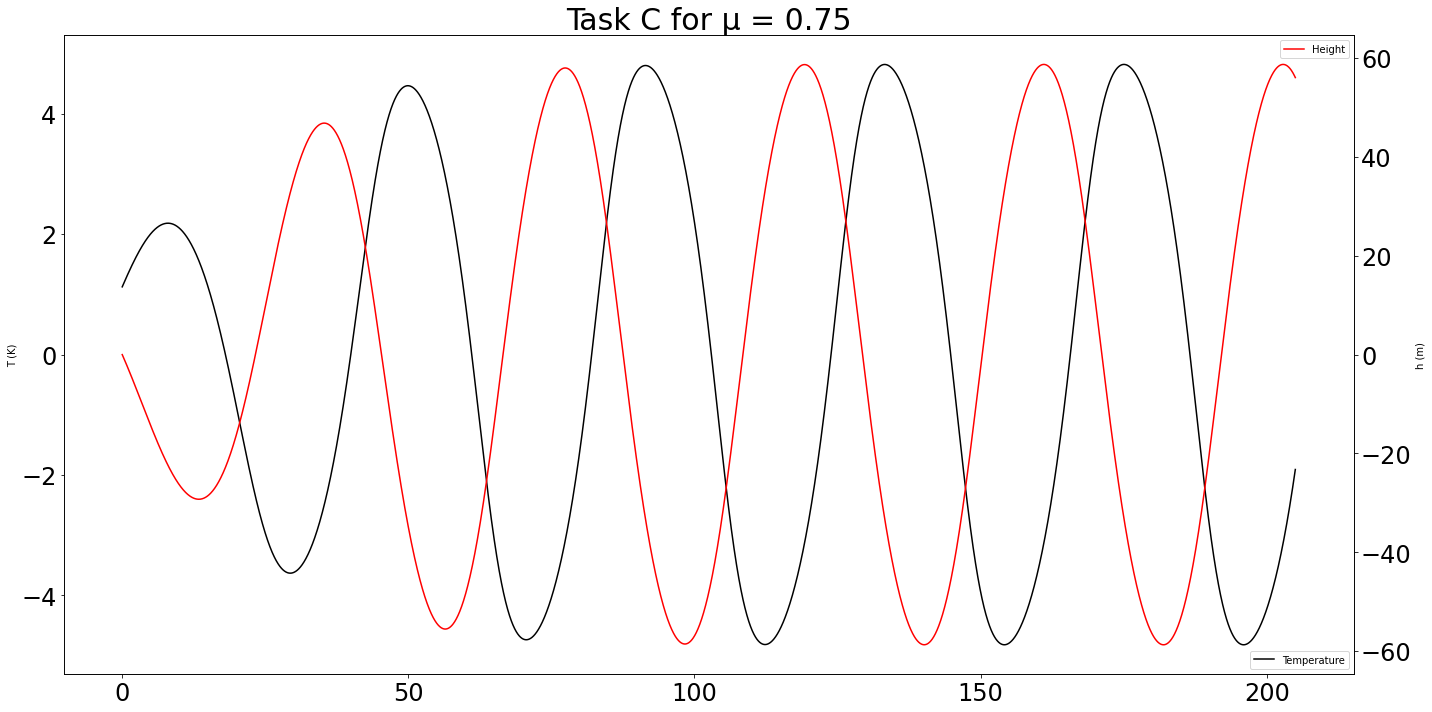

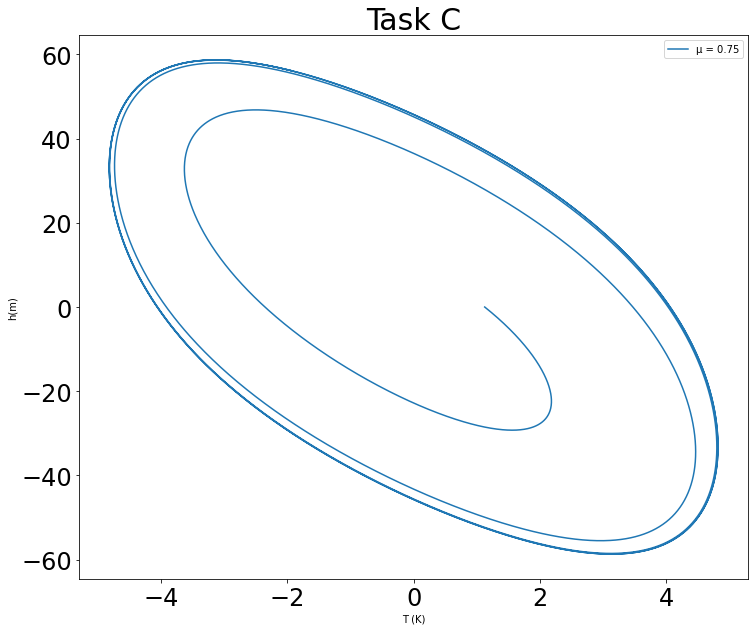

In [68]:
T,h = RungaKutta(1.125,0,0.75,0,1,Times,0.1,0,0,0,0)
Tnew = T*Tnon
hnew = h*hnon

fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.plot(Times*tnon,Tnew, 'k-', label='Temperature')
plt.ylabel('T (K)')
plt.legend(loc='lower right')
ax2=ax1.twinx()
ax2.plot(Times*tnon,hnew, 'r-', label='Height')
plt.ylabel('h (m)')
plt.legend(loc='best')
ax1.xaxis.set_tick_params(labelsize=24)
ax1.yaxis.set_tick_params(labelsize=24)
ax2.yaxis.set_tick_params(labelsize=24)
plt.xlabel('t (month)')
plt.ylabel('h (m)')
plt.title('Task C for µ = 0.75',fontsize = 30)
plt.tight_layout()
#plt.show()
figname='RK-timeseries.png'
fig.savefig(figname, dpi=300)

fig, ax1 = plt.subplots(figsize=(12, 10))
#Against each other
ax1.plot(Tnew,hnew,label='µ = 0.75')
plt.legend(loc='best')
ax1.xaxis.set_tick_params(labelsize=24)
ax1.yaxis.set_tick_params(labelsize=24)
plt.xlabel('T (K)')
plt.ylabel('h(m)')
plt.title('Task C',fontsize = 30)
#plt.show()
figname='RK-phase.png'
fig.savefig(figname, dpi=300)

# Task D

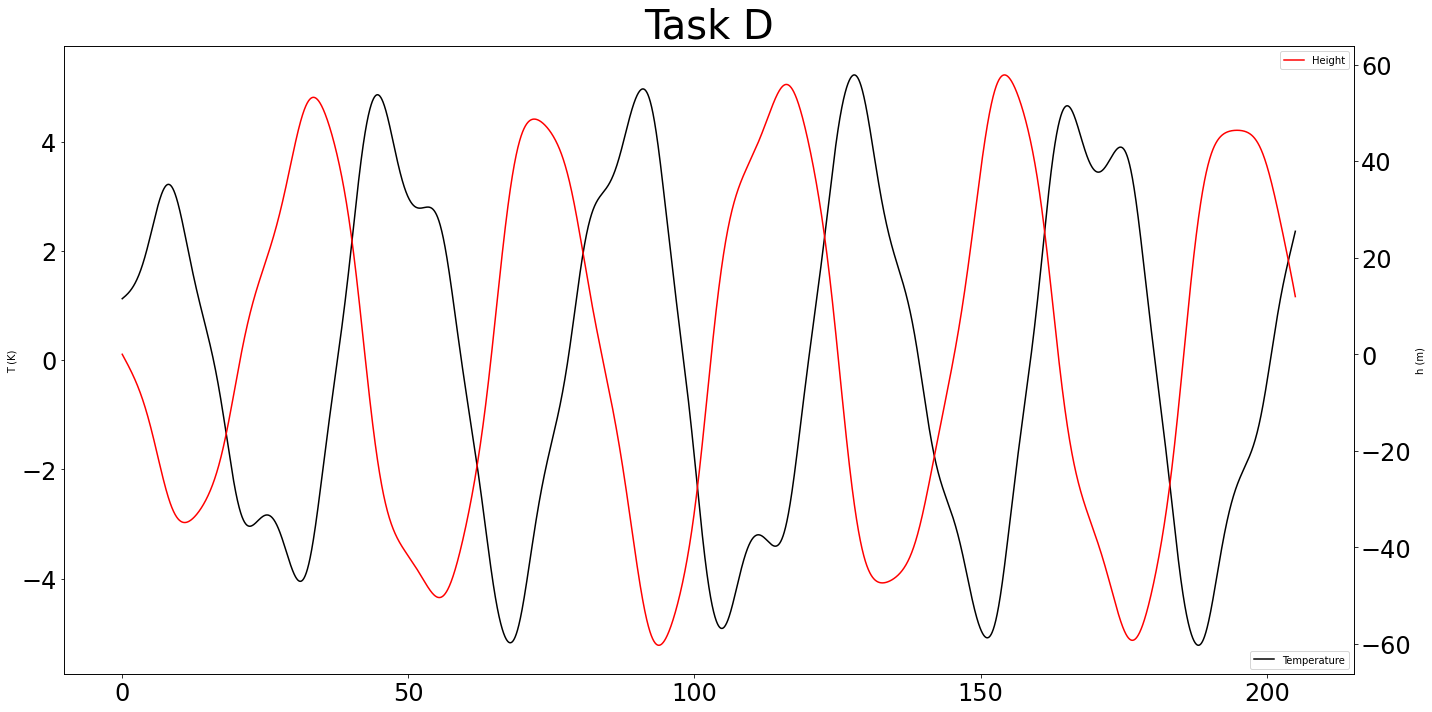

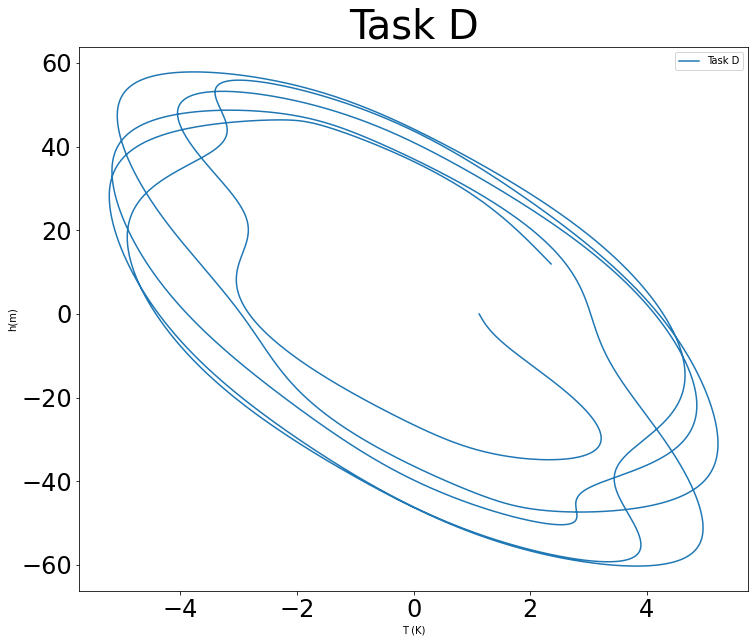

In [69]:
T,h = RungaKutta(1.125,0,0.75,0.2,12/tnon,Times,0.1,0,0,0,0)
Tnew = T*Tnon
Tnew = T*Tnon
hnew = h*hnon

fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.plot(Times*tnon,Tnew, 'k-', label='Temperature')
plt.ylabel('T (K)')
plt.legend(loc='lower right')
ax2=ax1.twinx()
ax2.plot(Times*tnon,hnew, 'r-', label='Height')
plt.ylabel('h (m)')
plt.legend(loc='best')
ax1.xaxis.set_tick_params(labelsize=24)
ax1.yaxis.set_tick_params(labelsize=24)
ax2.yaxis.set_tick_params(labelsize=24)
plt.xlabel('t (month)')
plt.ylabel('h (m)')
plt.title('Task D',fontsize = 40)
plt.tight_layout()
#plt.show()
figname='RK-timeseriesTaskD.png'
fig.savefig(figname, dpi=300)

fig, ax1 = plt.subplots(figsize=(12, 10))
#Against each other
ax1.plot(Tnew,hnew,label='Task D')
ax1.xaxis.set_tick_params(labelsize=24)
ax1.yaxis.set_tick_params(labelsize=24)
plt.legend(loc='best')
plt.xlabel('T (K)')
plt.ylabel('h(m)')
plt.title('Task D',fontsize = 40)
#plt.show()
figname='RK-phaseTaskD.png'
fig.savefig(figname, dpi=300)

# Task E

## Both wind forcings 

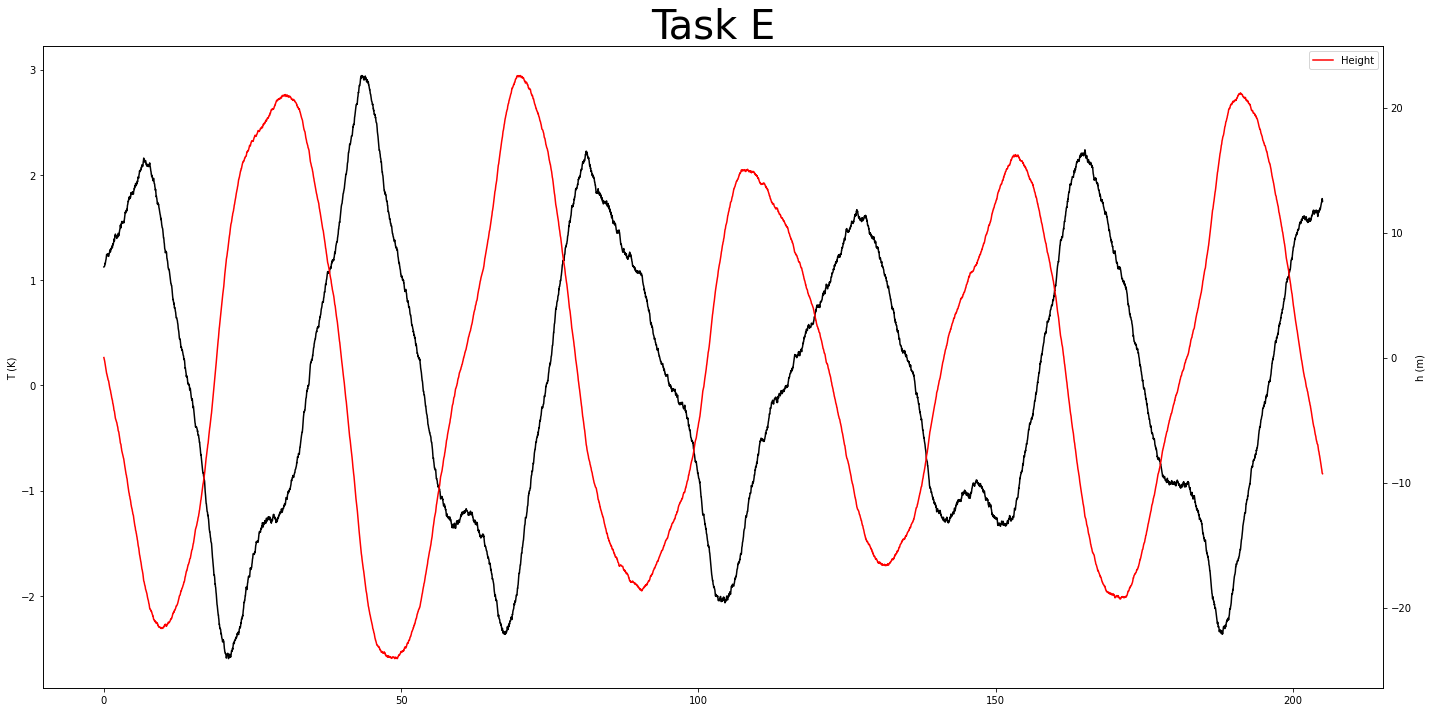

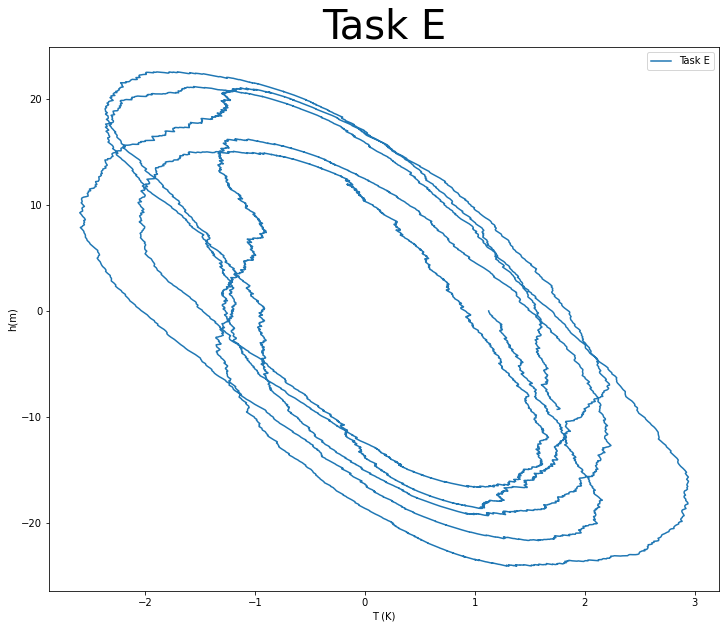

In [70]:

#Task E

T,h = RungaKutta(1.125,0,2/3,0.2,12/tnon,Times,0,0,0.02,0.2,(1/30)/tnon)
Tnew = T*Tnon
hnew = h*hnon

#Both
fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.plot(Times*tnon,Tnew, 'k-', label='Temperature')
plt.ylabel('T (K)')
ax2=ax1.twinx()
ax2.plot(Times*tnon,hnew, 'r-', label='Height')
plt.ylabel('h (m)')
plt.legend(loc='best')
plt.xlabel('t (month)')
plt.ylabel('h (m)')
plt.title('Task E',fontsize = 40)
plt.tight_layout()
#plt.show()
figname='RK-timeseriesTaskE.png'
fig.savefig(figname, dpi=300)

fig, ax1 = plt.subplots(figsize=(12, 10))
#Against each other
plt.plot(Tnew,hnew,label='Task E')
plt.legend(loc='best')
plt.xlabel('T (K)')
plt.ylabel('h(m)')
plt.title('Task E',fontsize = 40)
#plt.show()
figname='RK-phaseTaskE.png'
fig.savefig(figname, dpi=300)



## Only Annual

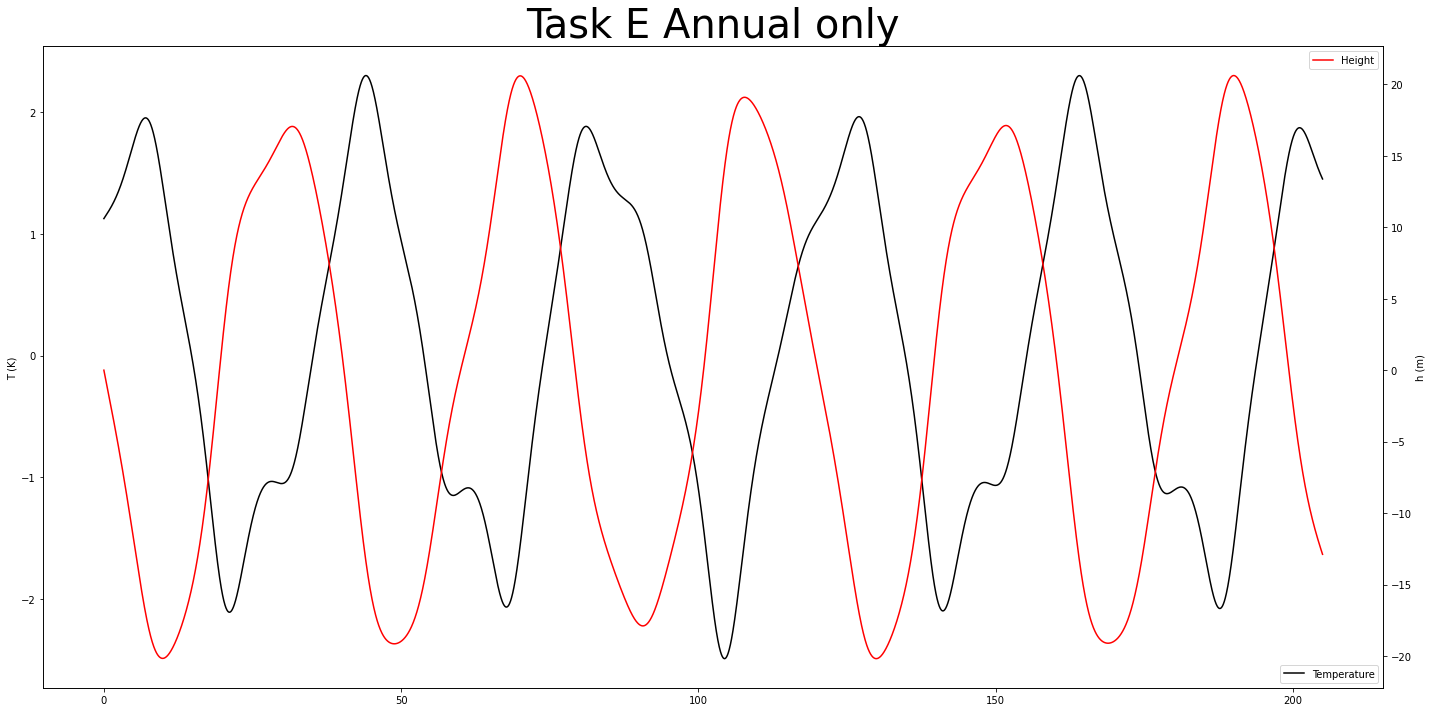

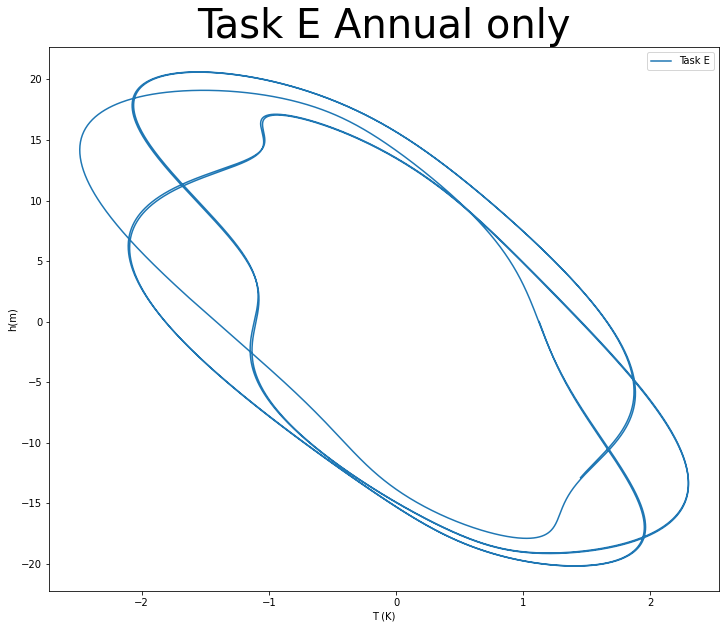

In [71]:
T,h = RungaKutta(1.125,0,2/3,0.2,12/tnon,Times,0,0,0.02,0,(1/30)/tnon)
Tnew = T*Tnon
hnew = h*hnon

#Both
fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.plot(Times*tnon,Tnew, 'k-', label='Temperature')
plt.ylabel('T (K)')
plt.legend(loc='lower right')
ax2=ax1.twinx()
ax2.plot(Times*tnon,hnew, 'r-', label='Height')
plt.ylabel('h (m)')
plt.legend(loc='best')
plt.xlabel('t (month)')
plt.ylabel('h (m)')
plt.title('Task E Annual only',fontsize = 40)
plt.tight_layout()
#plt.show()
figname='RK-timeseriesTaskEAnnual.png'
fig.savefig(figname, dpi=300)

fig, ax1 = plt.subplots(figsize=(12, 10))
#Against each other
plt.plot(Tnew,hnew,label='Task E')
plt.legend(loc='best')
plt.xlabel('T (K)')
plt.ylabel('h(m)')
plt.title('Task E Annual only',fontsize = 40)
#plt.show()
figname='RK-phaseTaskEannual.png'
fig.savefig(figname, dpi=300)

## Random only

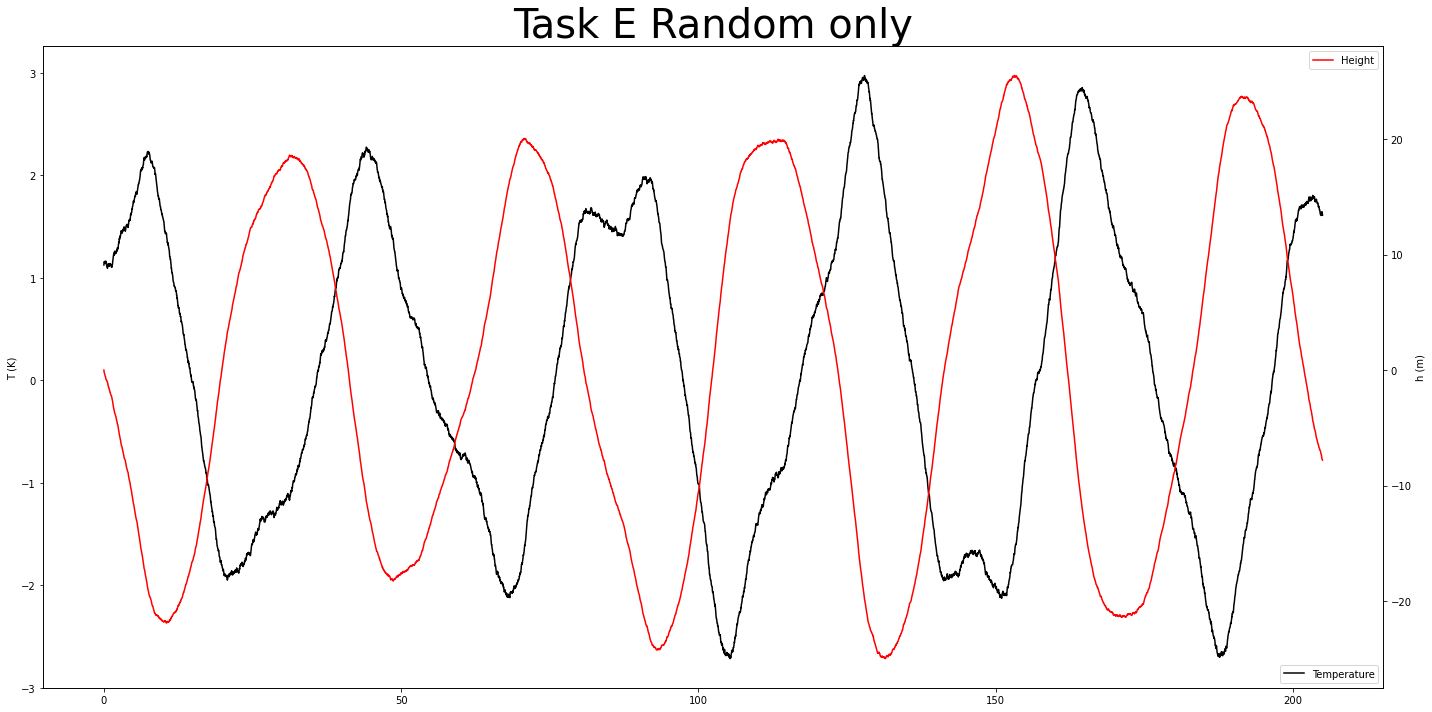

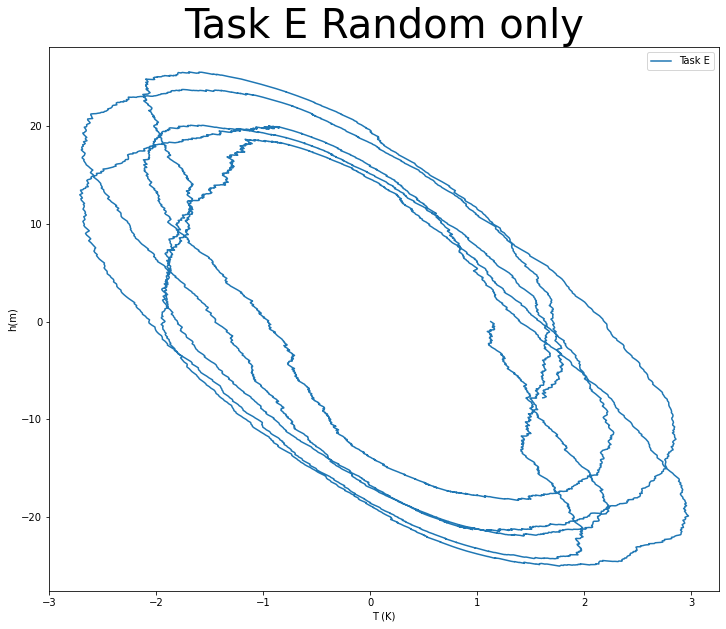

In [72]:
T,h = RungeKutta(1.125,0,2/3,0.2,12/tnon,Times,0,0,0,0.2,(1/30)/tnon)
Tnew = T*Tnon
hnew = h*hnon

#Both
fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.plot(Times*tnon,Tnew, 'k-', label='Temperature')
plt.ylabel('T (K)')
plt.legend(loc='lower right')
ax2=ax1.twinx()
ax2.plot(Times*tnon,hnew, 'r-', label='Height')
plt.ylabel('h (m)')
plt.legend(loc='best')
plt.xlabel('t (month)')
plt.ylabel('h (m)')
plt.title('Task E Random only',fontsize = 40)
plt.tight_layout()
#plt.show()
figname='RK-timeseriesTaskERandom.png'
fig.savefig(figname, dpi=300)

fig, ax1 = plt.subplots(figsize=(12, 10))
#Against each other
plt.plot(Tnew,hnew,label='Task E')
plt.legend(loc='best')
plt.xlabel('T (K)')
plt.ylabel('h(m)')
plt.title('Task E Random only',fontsize = 40)
#plt.show()
figname='RK-phaseTaskERandom.png'
fig.savefig(figname, dpi=300)

# Task F

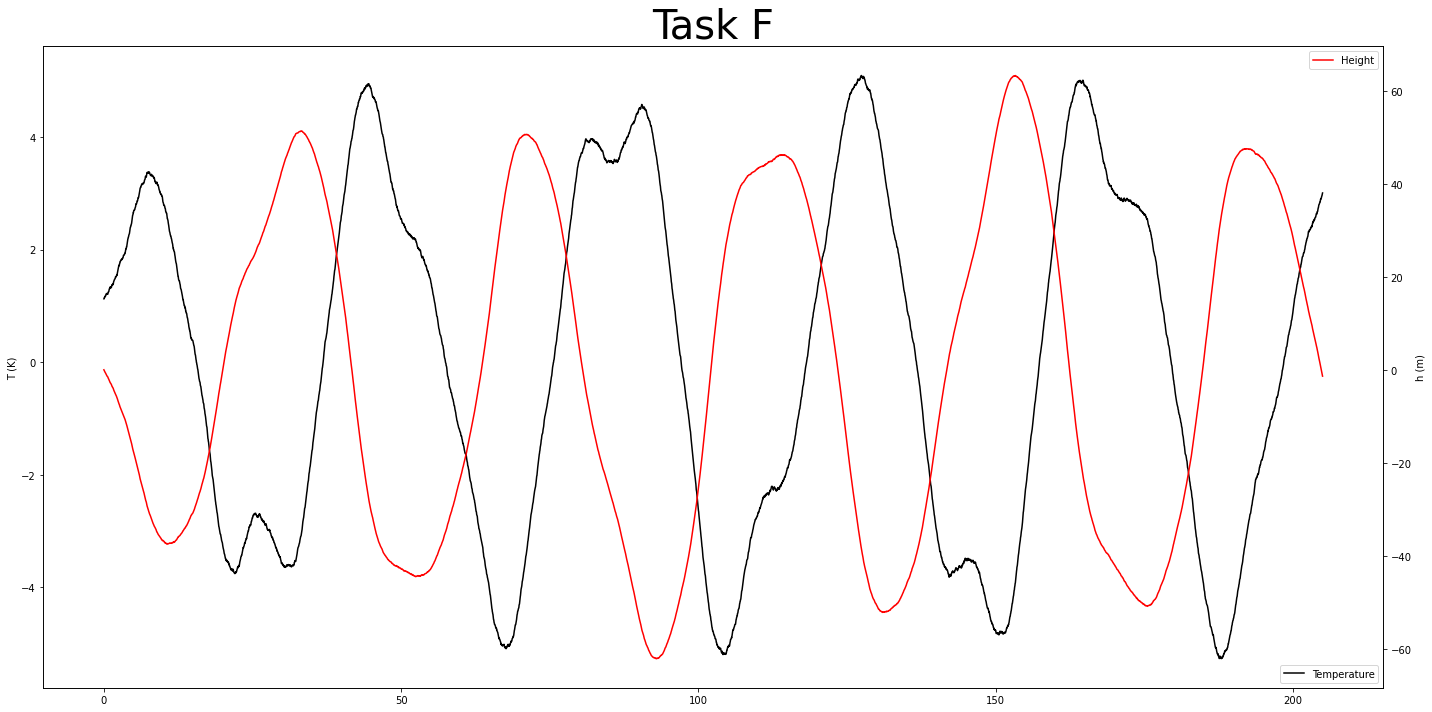

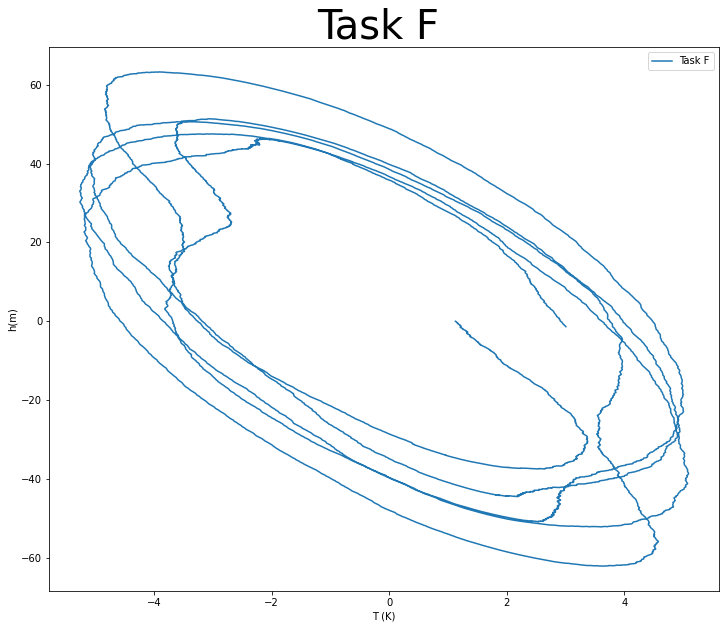

In [73]:
T,h = RungeKutta(1.125,0,0.75,0.2,12/tnon,Times,0.1,0,0.02,0.2,(1/30)/tnon)
Tnew = T*Tnon
hnew = h*hnon

fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.plot(Times*tnon,Tnew, 'k-', label='Temperature')
plt.ylabel('T (K)')
plt.legend(loc='lower right')
ax2=ax1.twinx()
ax2.plot(Times*tnon,hnew, 'r-', label='Height')
plt.ylabel('h (m)')
plt.legend(loc='best')
plt.xlabel('t (month)')
plt.ylabel('h (m)')
plt.title('Task F',fontsize = 40)
plt.tight_layout()
#plt.show()
figname='RK-timeseriesTaskF.png'
fig.savefig(figname, dpi=300)

fig, ax1 = plt.subplots(figsize=(12, 10))
#Against each other
plt.plot(Tnew,hnew,label='Task F')
plt.legend(loc='best')
plt.xlabel('T (K)')
plt.ylabel('h(m)')
plt.title('Task F ',fontsize = 40)
#plt.show()
figname='RK-phaseTaskF.png'
fig.savefig(figname, dpi=300)

# Task G Ensembles

## I made 12 ensembles in this case  

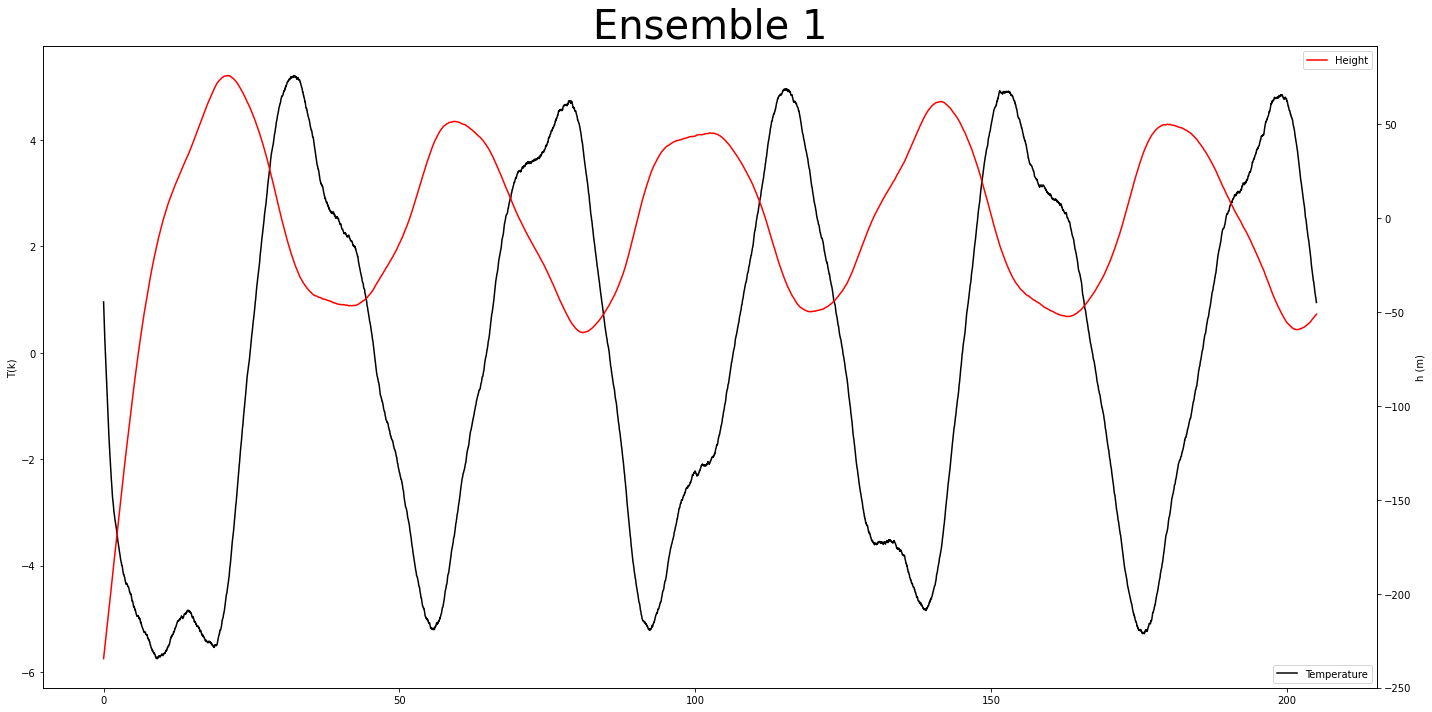

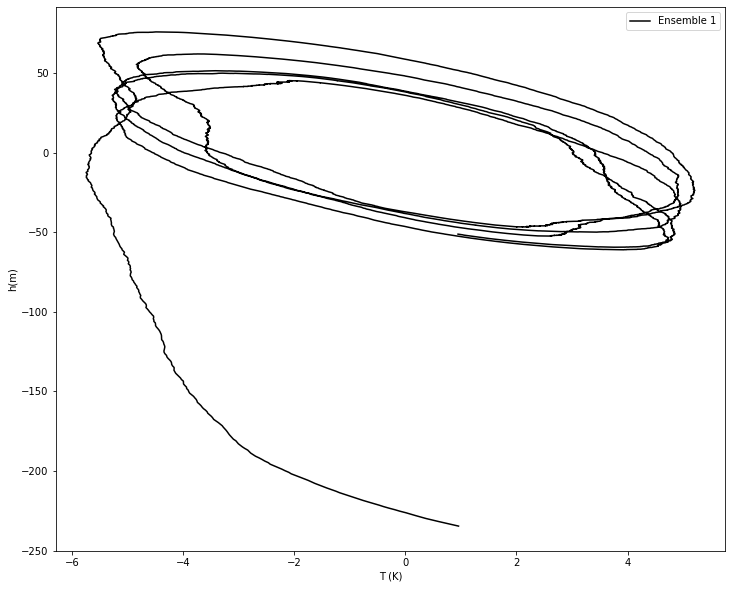

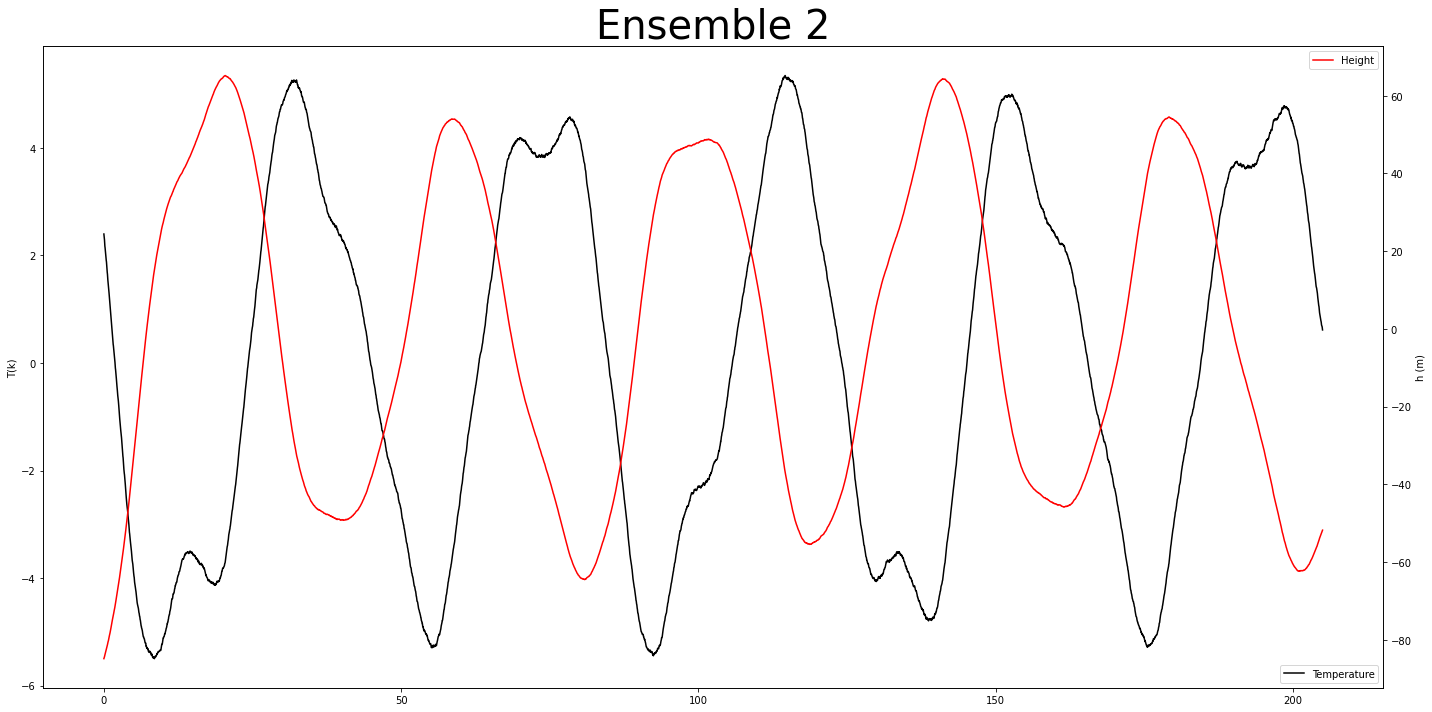

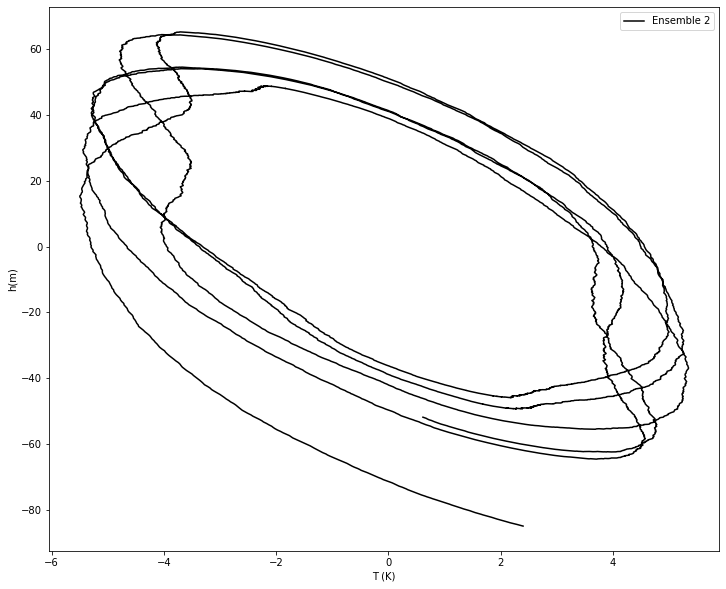

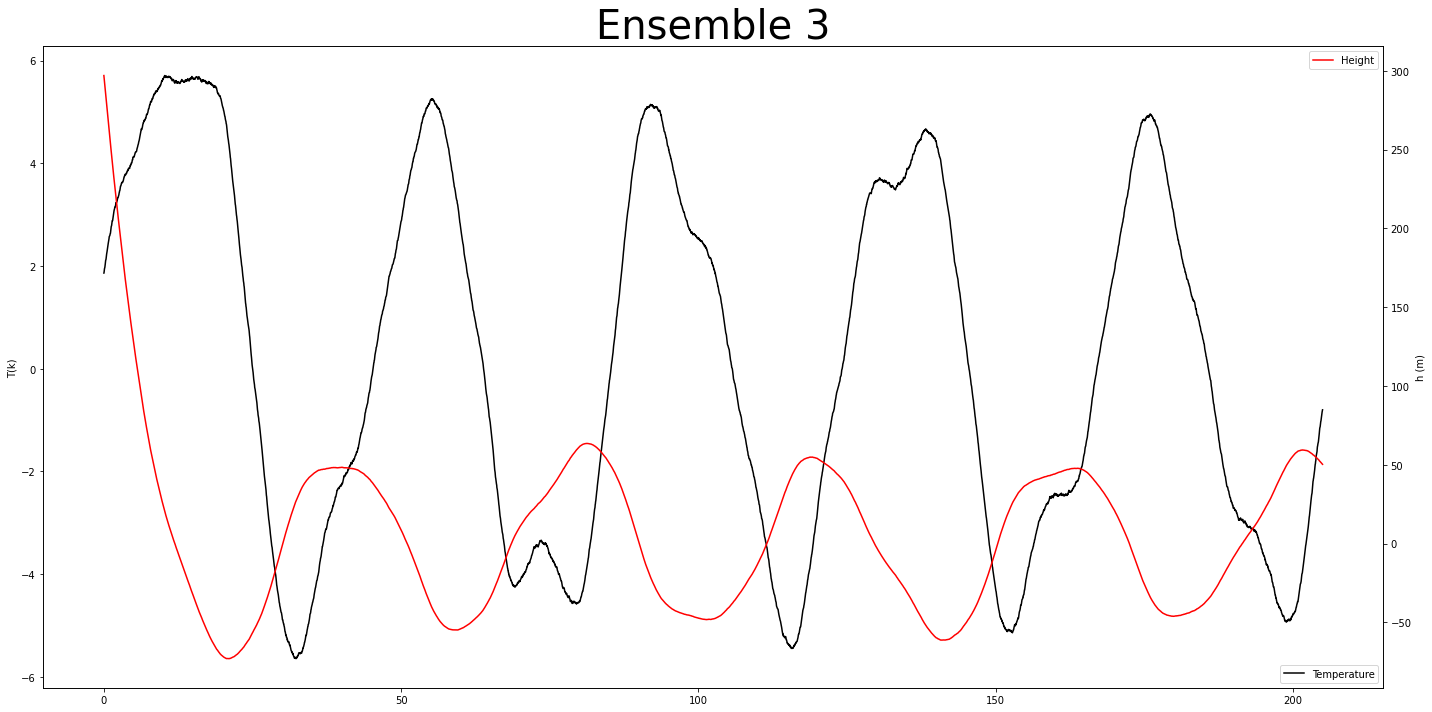

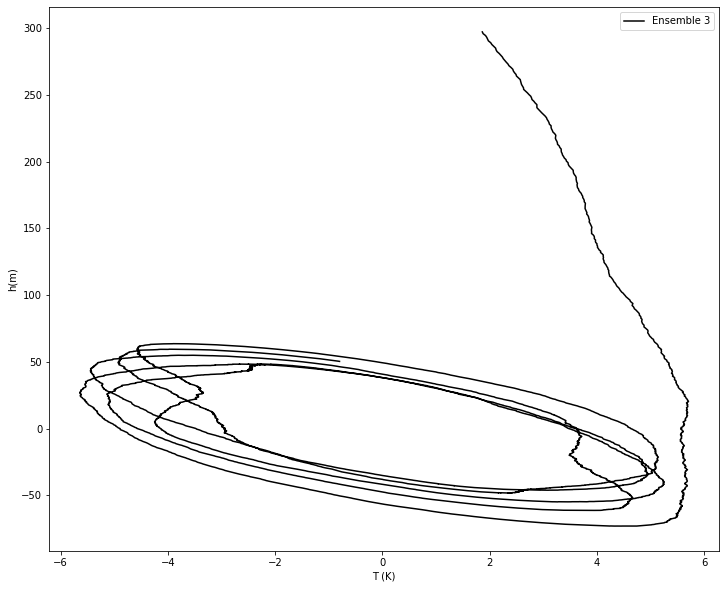

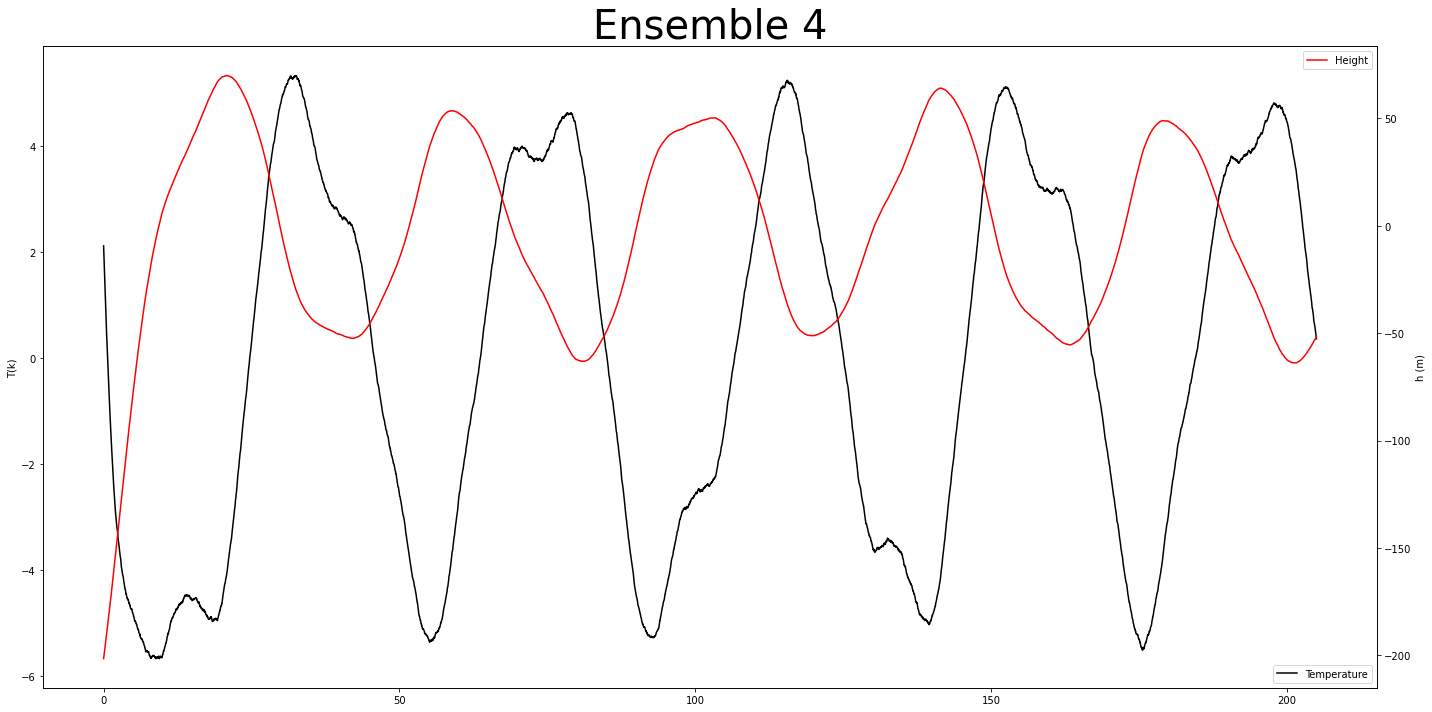

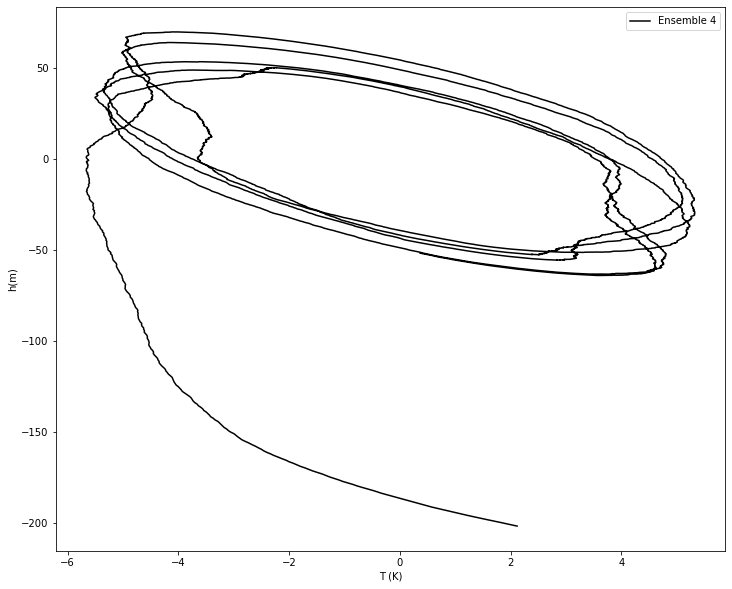

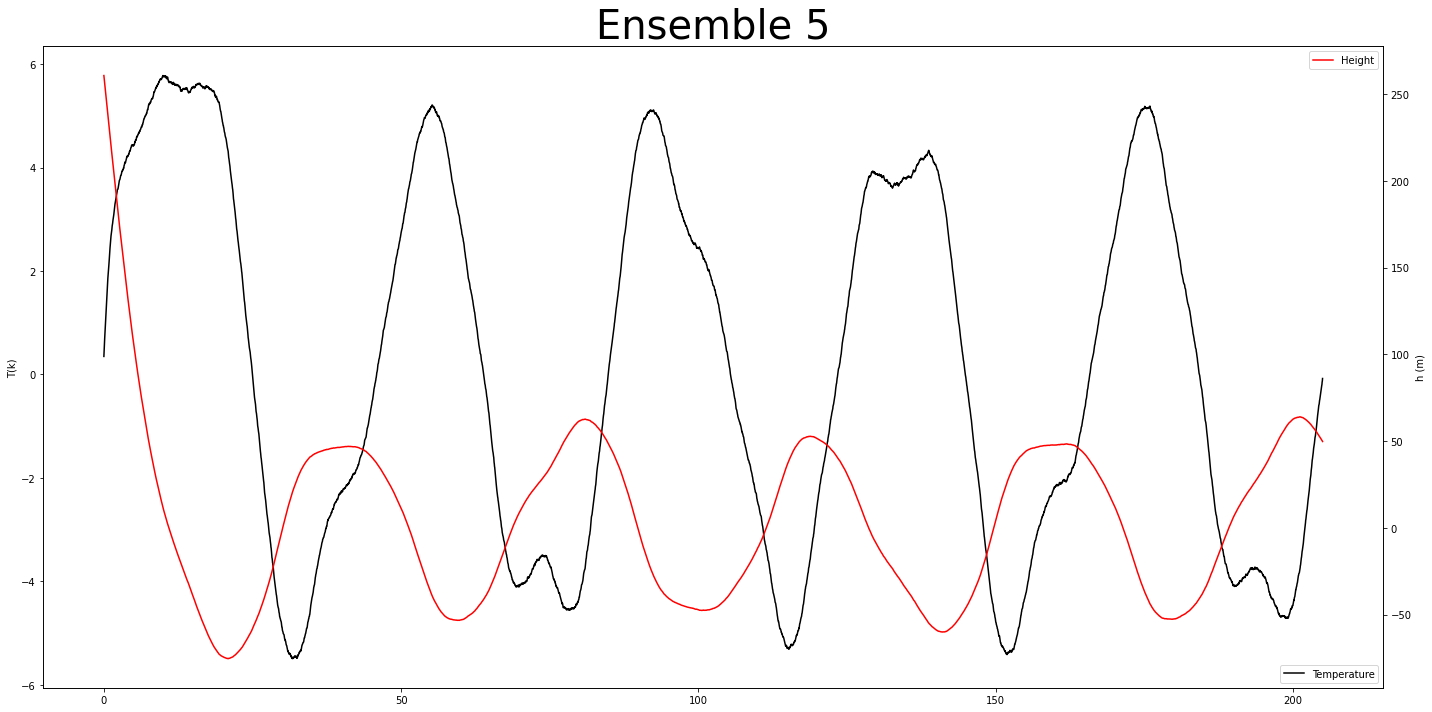

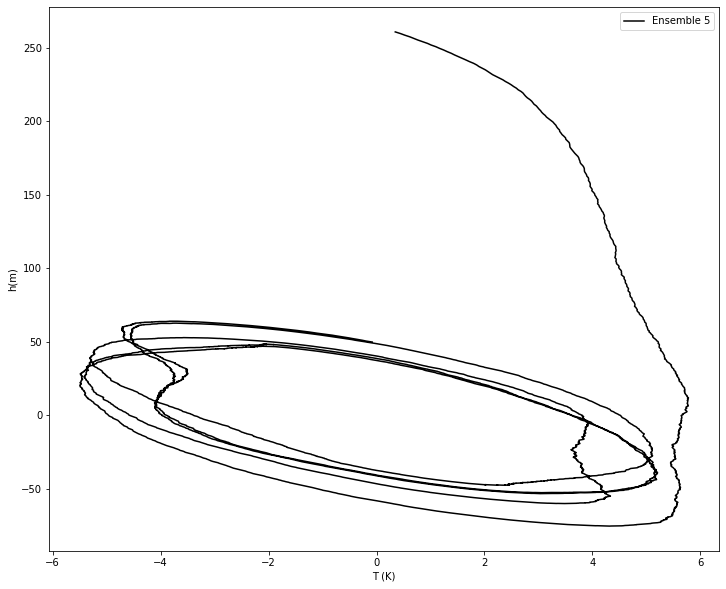

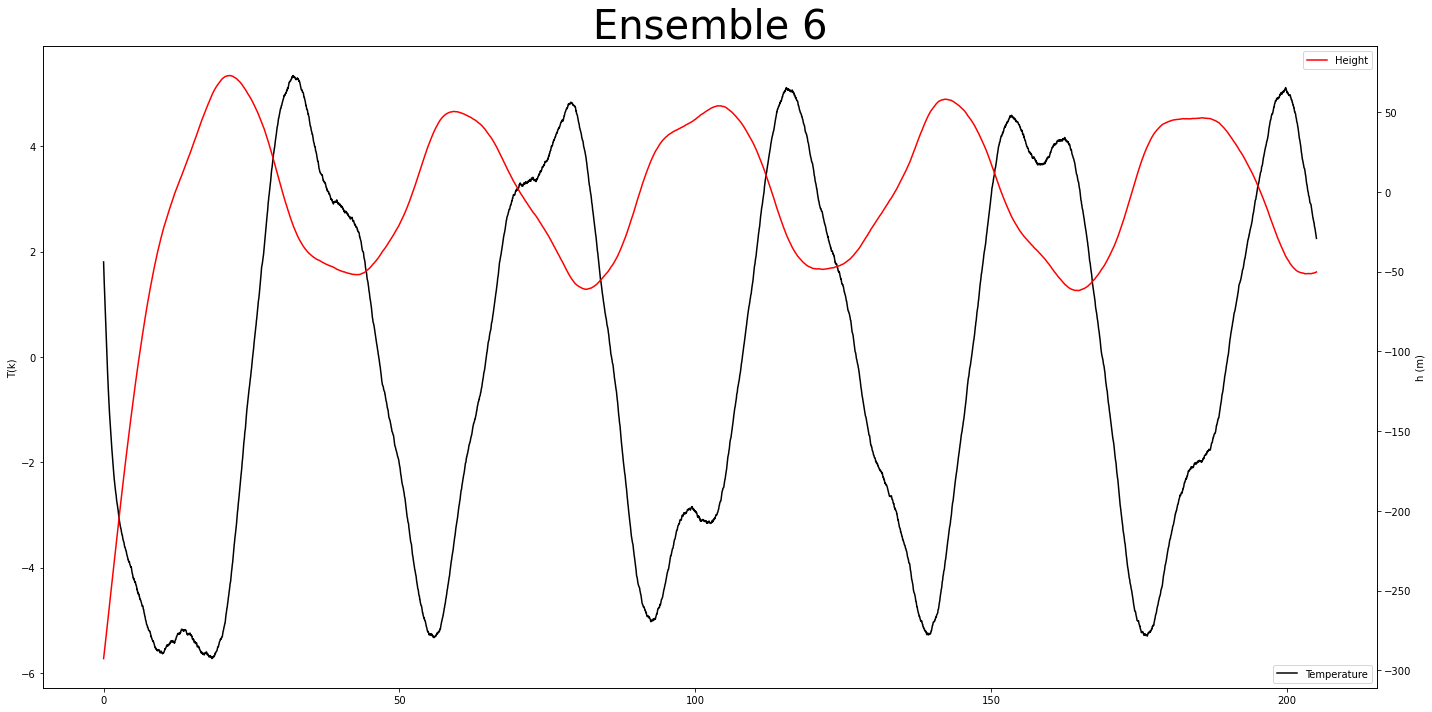

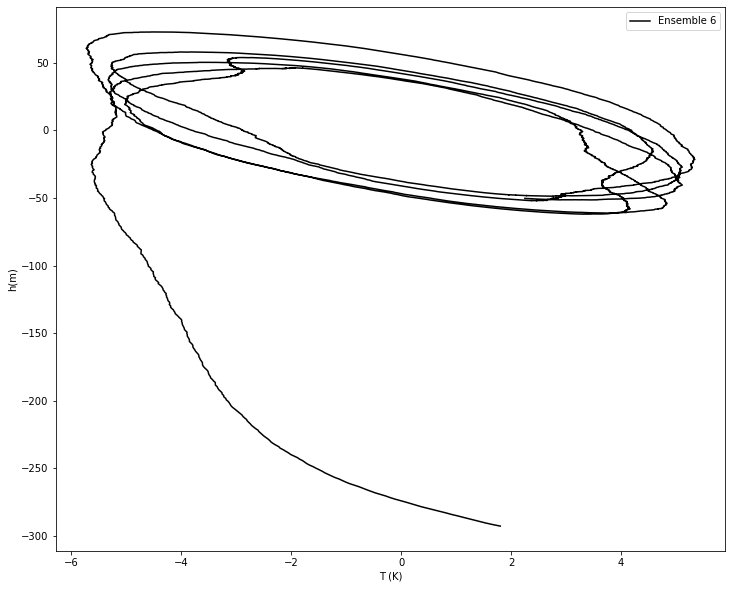

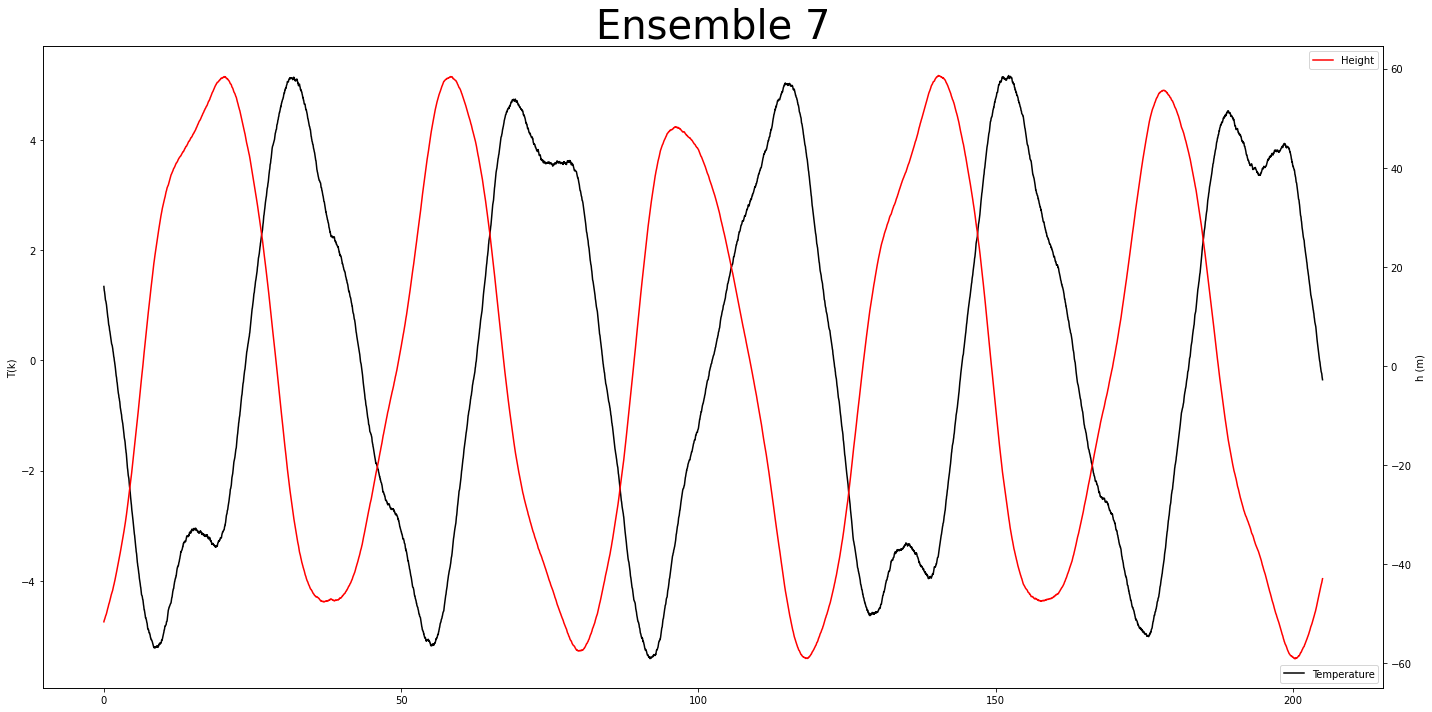

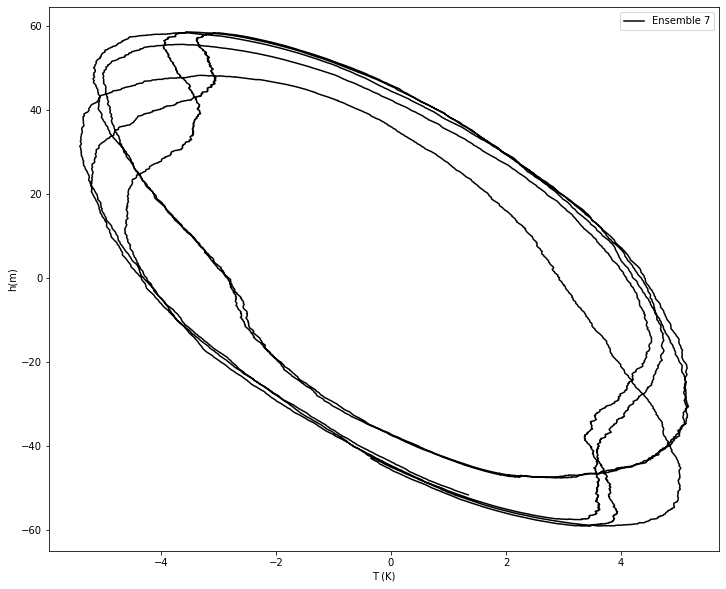

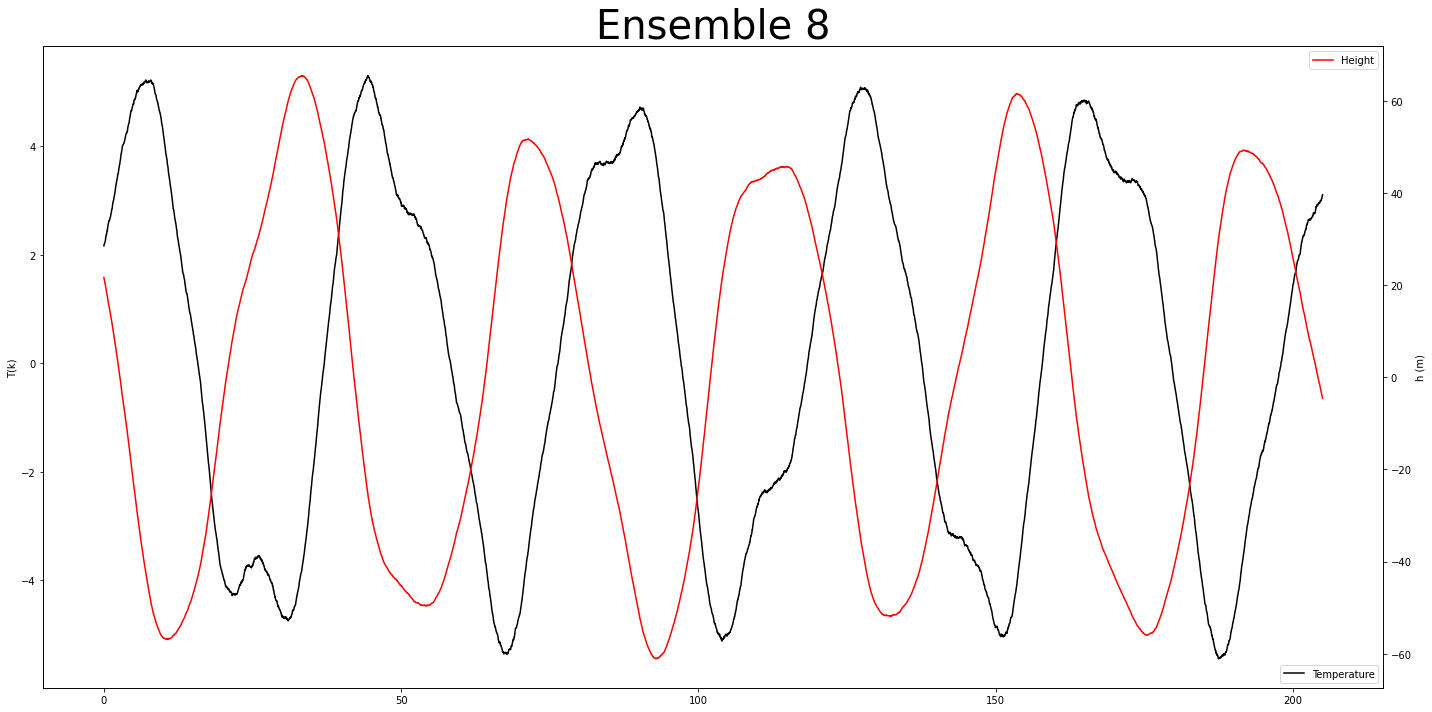

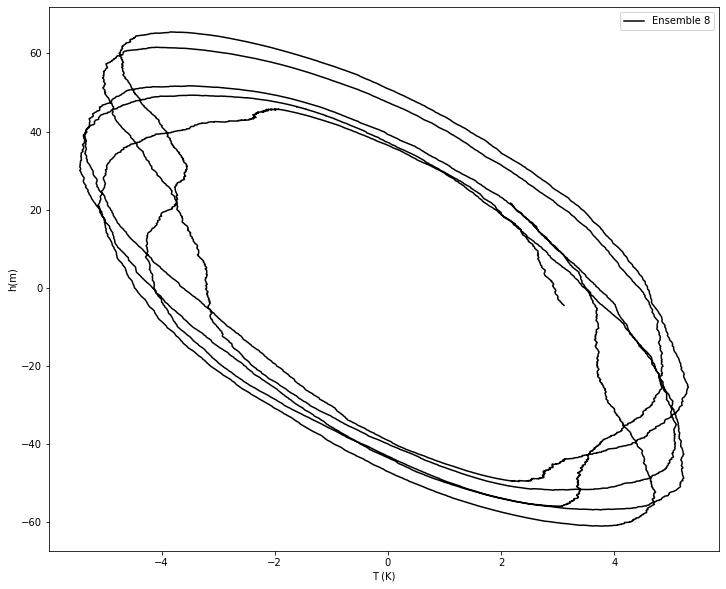

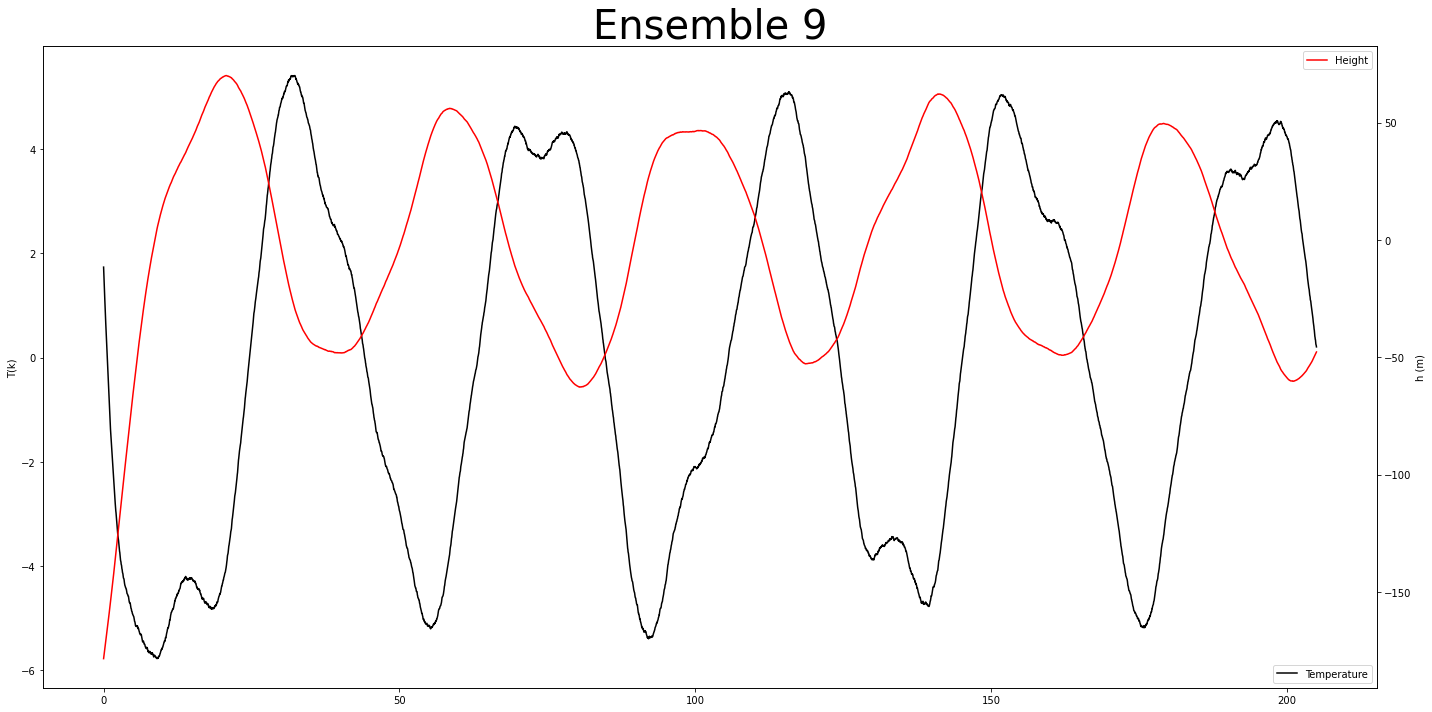

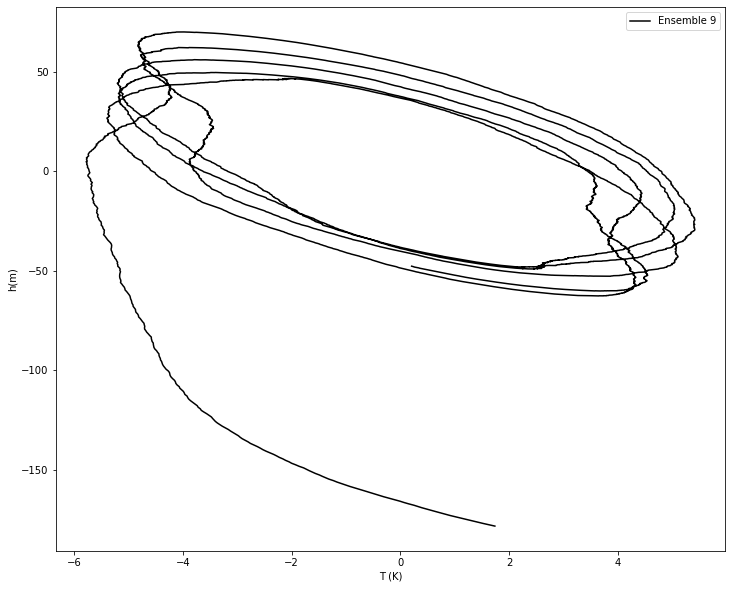

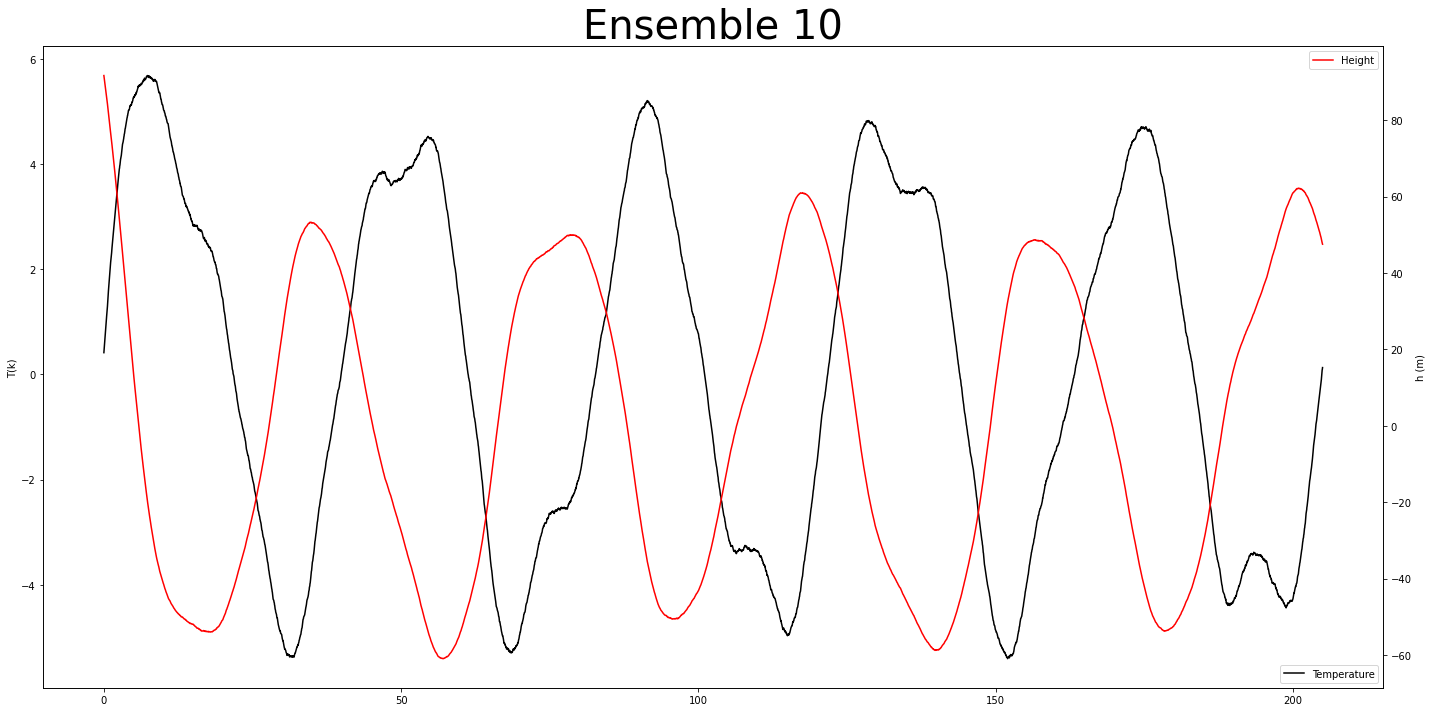

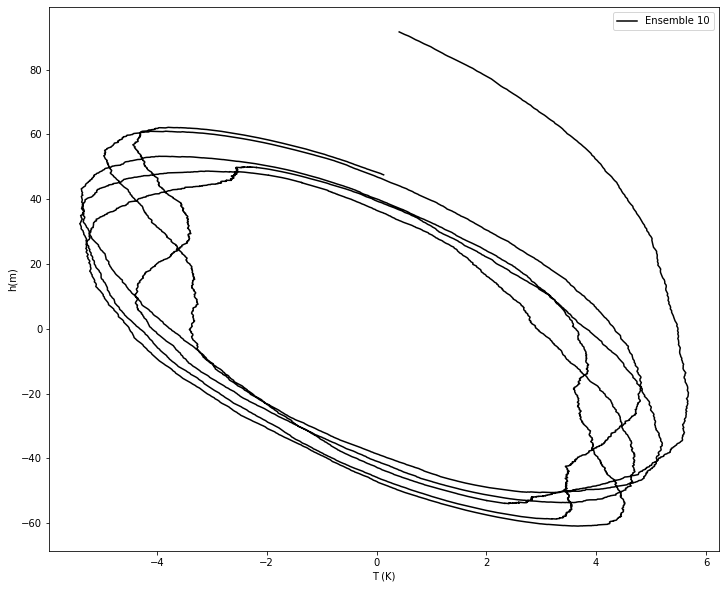

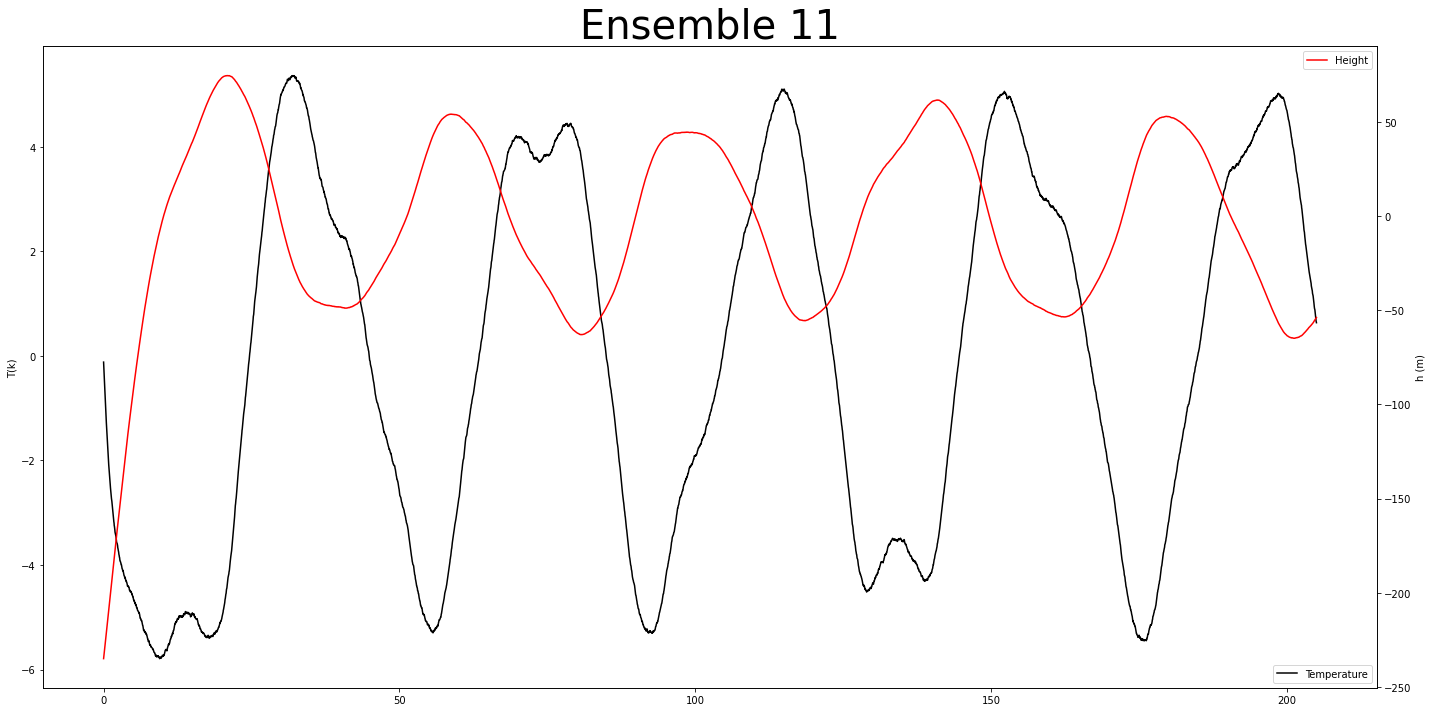

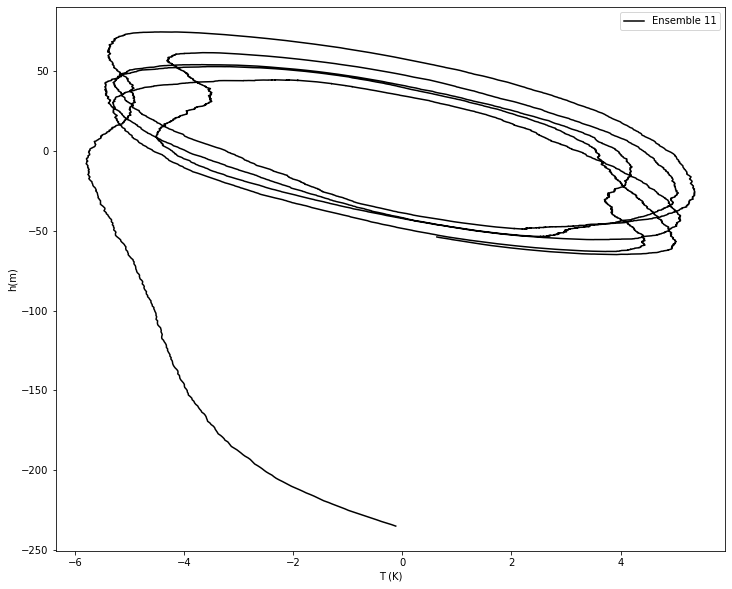

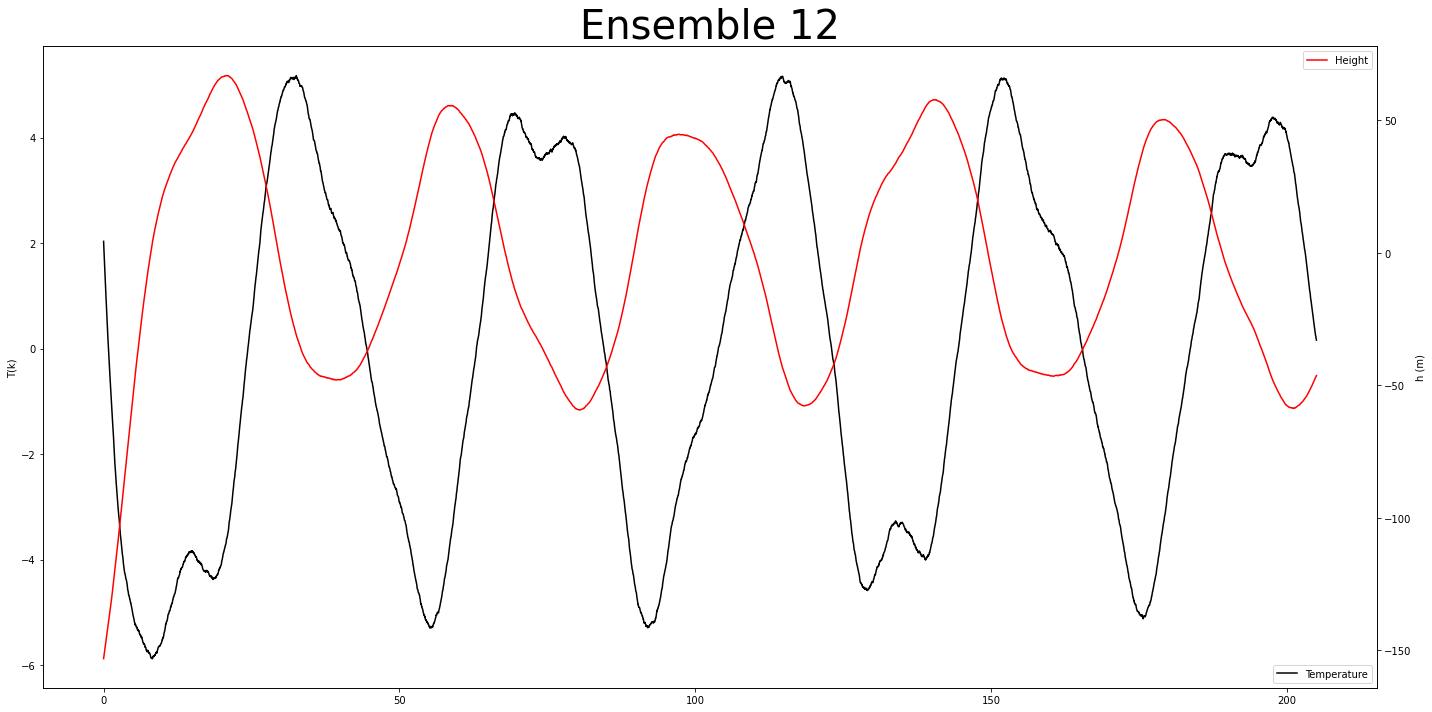

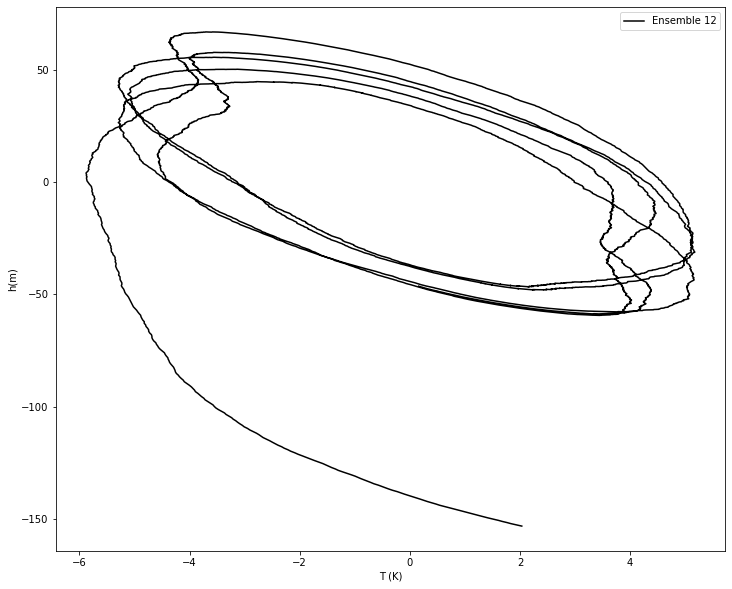

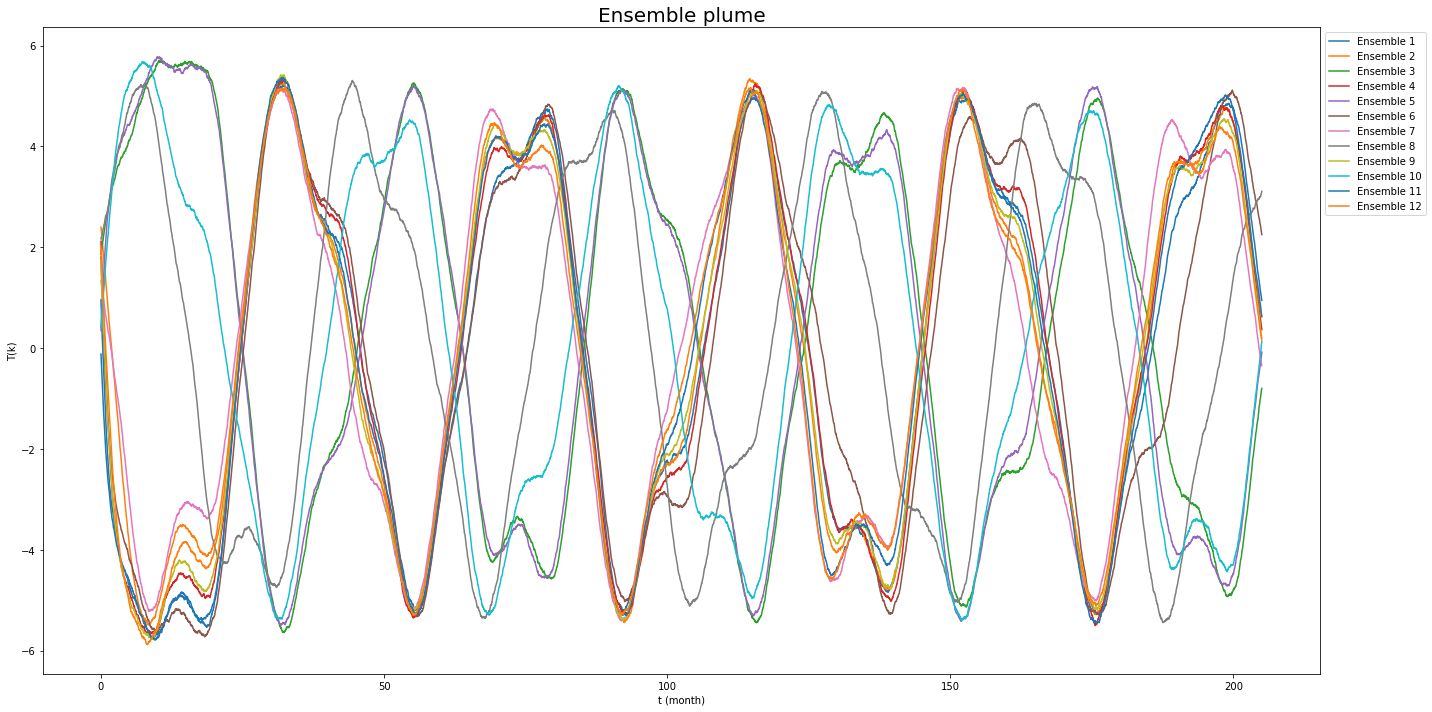

In [80]:

def Runge_Kutta(Tinit,hinit,µo,µann,τ,t,en,fann,fran,τcorr,E2):
    
    Tfin = []
    hfin = []
    Tfin1 = []
    hfin1 = []

    for i in range(12):
        Tarray = (Tinit/Tnon)*np.ones((nt,1))
        harray = (hinit/hnon)*np.ones((nt,1))
        WT = np.random.uniform(-0.2,0.2,(nt,1))
        Wh = np.random.uniform(-2,2,(nt,1))
        Tnew = Tarray + WT
        hnew = harray + Wh 
        Tfin.append(Tnew)
        hfin.append(hnew)
        
    for j in range(12):
        T = Tfin[j]
        h = hfin[j]
        
        for i in range(nt-1):
        
            W = np.random.uniform(-1,1)
            E1 = noisywind(fann,fran,τ,t[i],W,τcorr,dtnon)
            b = b0*Selfexcite(µo,µann,τ,t[i])
            R = γ*b - c 
        
            k1 = Tval(b,R,γ,T[i],h[i],en,E1,E2)
            l1 = hval(r,α,b,T[i],h[i],E1)
        
            k2 = Tval(b,R,γ,T[i]+(k1*dtnon/2),h[i]+(l1*dtnon/2),en,E1,E2)
            l2 = hval(r,α,b,T[i]+(k1*dtnon/2),h[i]+(l1*dtnon/2),E1)
        
            k3 = Tval(b,R,γ,T[i]+(k2*dtnon/2),h[i]+(l2*dtnon/2),en,E1,E2)
            l3 = hval(r,α,b,T[i]+(k2*dtnon/2),h[i]+(l2*dtnon/2),E1)
    
            k4 = Tval(b,R,γ,T[i]+(k3*dtnon),h[i]+(l3*dtnon),en,E1,E2)
            l4 = hval(r,α,b,T[i]+(k3*dtnon),h[i]+(l3*dtnon),E1)
        
            T[i+1]=T[i]+ 1/6 * dtnon*(k1 + 2*k2 + 2*k3 + k4)
            h[i+1]=h[i] + 1/6 * dtnon*(l1 + 2*l2 + 2*l3 + l4)
                
        Tfin1.append(T) 
        hfin1.append(h)
            
        
    return Tfin1,hfin1

Tplot,hplot = Runge_Kutta(1.125,0,0.75,0.2,12/tnon,Times,0.1,0.02,0.2,(1/30)/tnon,0)



for i in range(12):
    Tplotvar = Tplot[i] * Tnon
    hplotvar = hplot[i] * hnon

    fig, ax1 = plt.subplots(figsize=(20,10))
    ax1.plot(Times*tnon,Tplotvar, 'k-', label='Temperature')
    plt.ylabel('T(k)')
    plt.legend(loc='lower right')
    ax2=ax1.twinx()
    ax2.plot(Times*tnon,hplotvar, 'r-', label='Height')
    plt.ylabel('h(m)')
    plt.legend(loc='best',bbox_to_anchor=(1,1))
    plt.xlabel('t (month)')
    plt.ylabel('h (m)')
    plt.title('Ensemble %i' %(i+1),fontsize = 40)
    plt.tight_layout()
    plt.show()
    figname='RK-timeseriesEnsemble %i' %(i+1)
    fig.savefig(figname, dpi=300)


    #Against each other
    fig, ax3 = plt.subplots(figsize=(12,10))
    plt.plot(Tplotvar,hplotvar,'k-', label='Ensemble %i' %(i+1))
    plt.legend(loc='best')
    plt.xlabel('T (K)')
    plt.ylabel('h(m)')
    plt.show()
    figname1='RK-phaseEnsemble %i' %(i+1)
    fig.savefig(figname1, dpi=300)
plt.figure(figsize=(20,10))
for i in range(12):
    Tplotvar = Tplot[i] * Tnon
    hplotvar = hplot[i] * hnon
    plt.plot(Times*tnon,Tplotvar,label='Ensemble %i' %(i+1))
    
plt.ylabel('T(k)')
plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.xlabel('t (month)')
plt.title('Ensemble plume',fontsize = 20)
plt.tight_layout()
plt.show()